Engenharia da Computação - UFMA - Aluno: Luan Alves


## 1. Entender o Conjunto de Dados
#### O que é o dataset?

É uma série temporal, onde em `arr_0` temos um vetor de vetores com 4 medidas do tipo float e em `arr_1` temos timestamps.

| timestamp | medidas |
| --------- | ------- |
| '2015-10-09T23:48:31.152250000' | [-70.49311 -70.62535 -70.61518 -70.84915] |
| '2015-10-09T23:48:31.160250000' | [-71.947784 -71.62226  -71.947784 -71.85623 ] |

Sabendo que o dataset é uma série temporal, podemos identificar as melhores formas de analisar, normalizar e detectar outliers.


## 2. Preprocessamento dos Dados

Por quê tratar e normalizar os dados?

A normalização de dados traz mais consistência aos nosso dados, removendo ou diminuindo a influência de outliers, além de facilitar a interpretação dos dados.

- Consistência de escala:

Os algoritmos de detecção de anomalias geralmente dependem da distância ou semelhança entre os pontos de dados. Se os recursos tiverem escalas diferentes, o algoritmo pode ser tendencioso para recursos com escalas maiores, levando potencialmente a resultados imprecisos.
A normalização garante que todos os recursos estejam em uma escala consistente, evitando que determinados recursos dominem o modelo.

- Convergência de modelo aprimorada:

Muitos algoritmos de aprendizado de máquina, incluindo aqueles usados para detecção de anomalias, têm melhor desempenho quando os recursos de entrada estão em uma escala semelhante. A normalização auxilia na convergência de algoritmos de otimização durante o processo de treinamento.
Pode ajudar o modelo a convergir mais rapidamente, levando a um treinamento mais rápido e estável.

- Sensibilidade do Algoritmo:

Alguns algoritmos de detecção de anomalias são sensíveis à magnitude dos dados. A normalização dos dados ajuda a reduzir a sensibilidade aos valores absolutos e concentra o modelo nos padrões e relacionamentos dentro dos dados.
Esta redução de sensibilidade é crucial para detectar anomalias que podem não ser imediatamente aparentes nos dados brutos.


Vamos usar o `StandardScaler`, `MinMaxScaler` e `RobustScaler` para normalizar os dados e comparar os resultados

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

dados = []
timestamps = []

with np.load('./dataset_shrink_transformed.npz') as data:
    for field in data.files:
        print(field)
        campo = data[field]
        #print(campo.shape)
        if(len(campo.shape) == 2):
            dados = campo
        else:
            timestamps = campo

print(timestamps.shape)
print(dados.shape)

arr_0
arr_1
(2000000,)
(2000000, 10)


### 2.1 Standard Scaler

Normaliza os dados removendo a média e dimensionando para a variação unitária. (Z-Score)

0


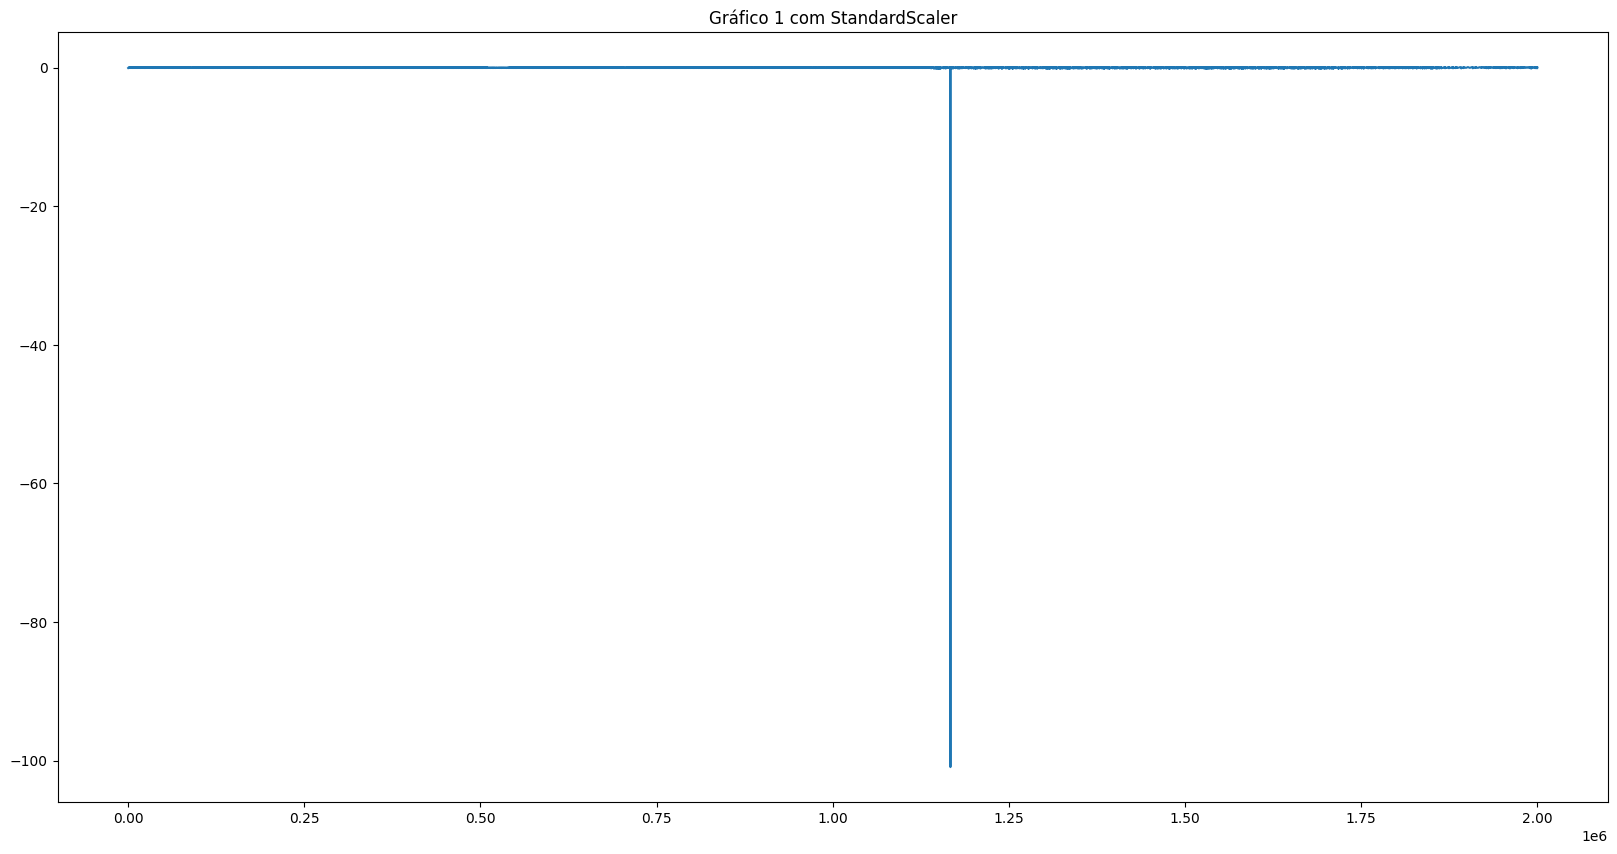

1


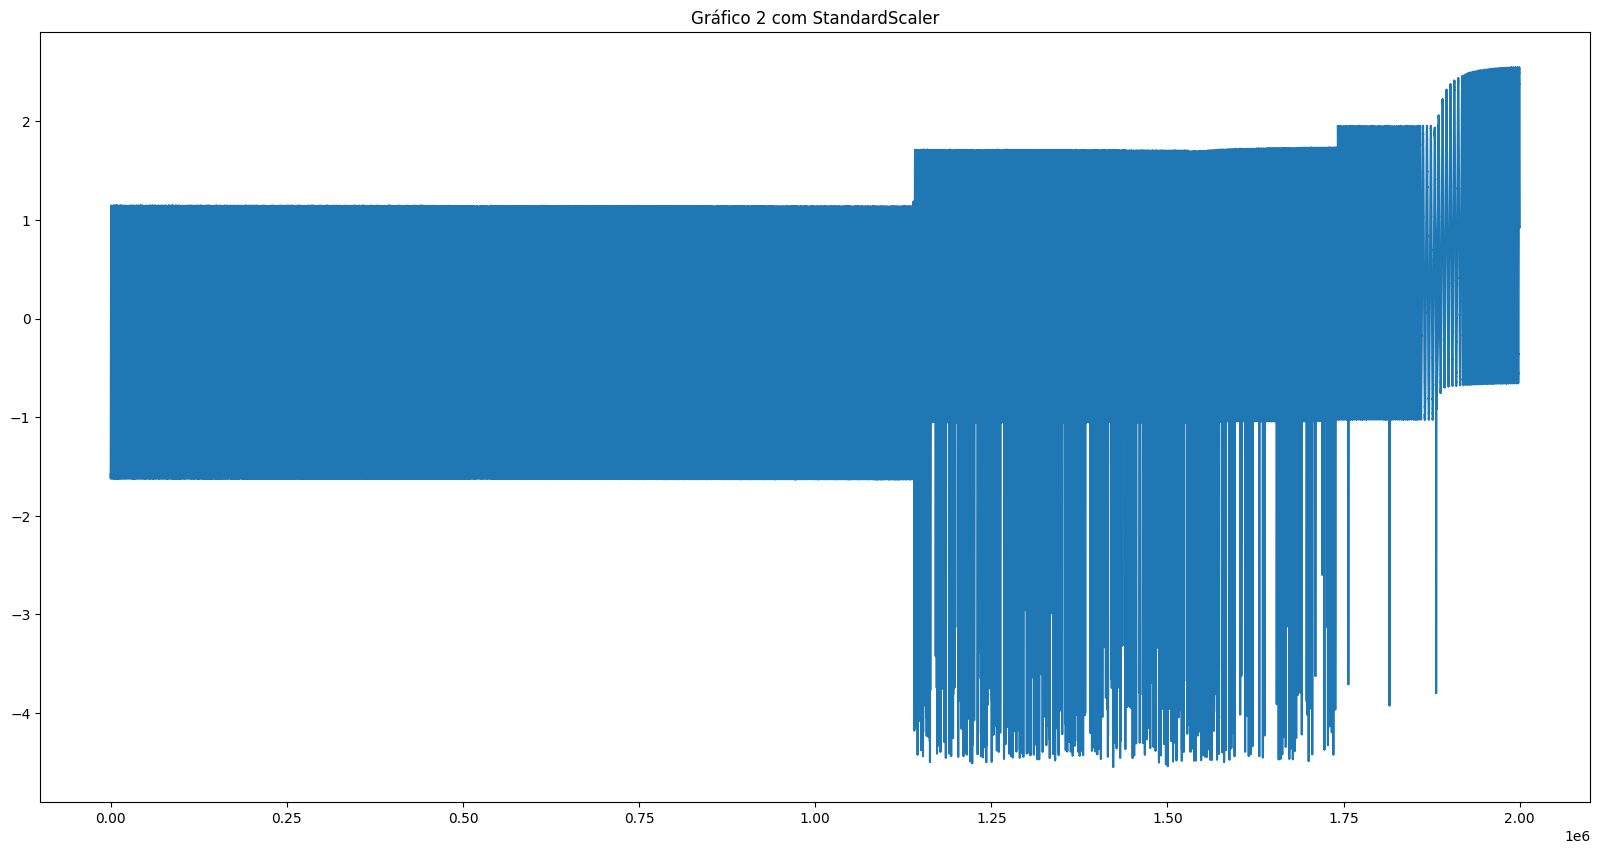

2


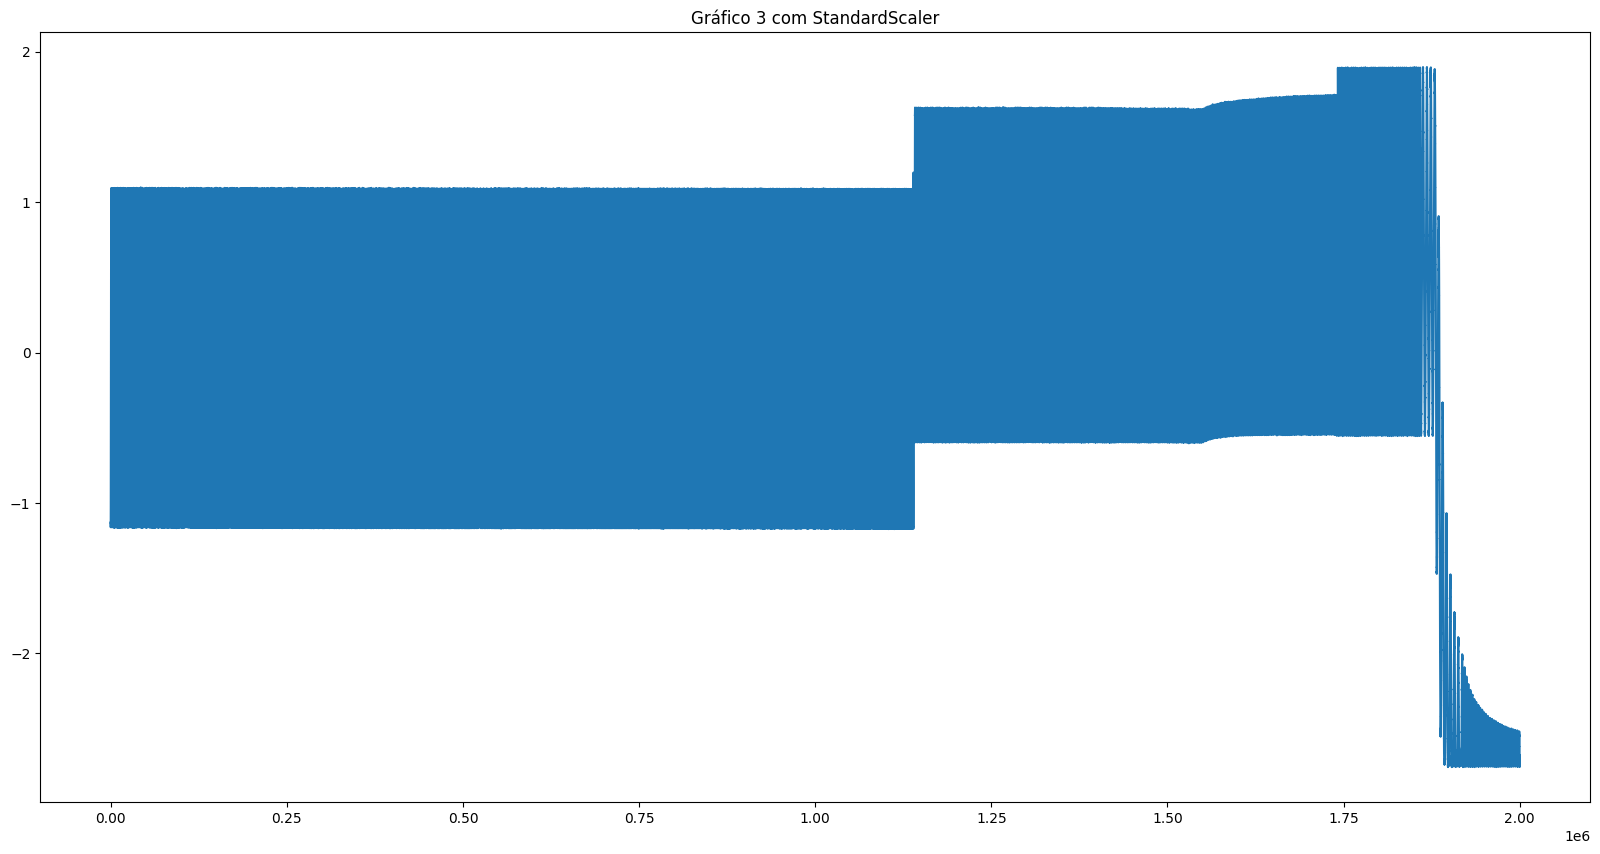

3


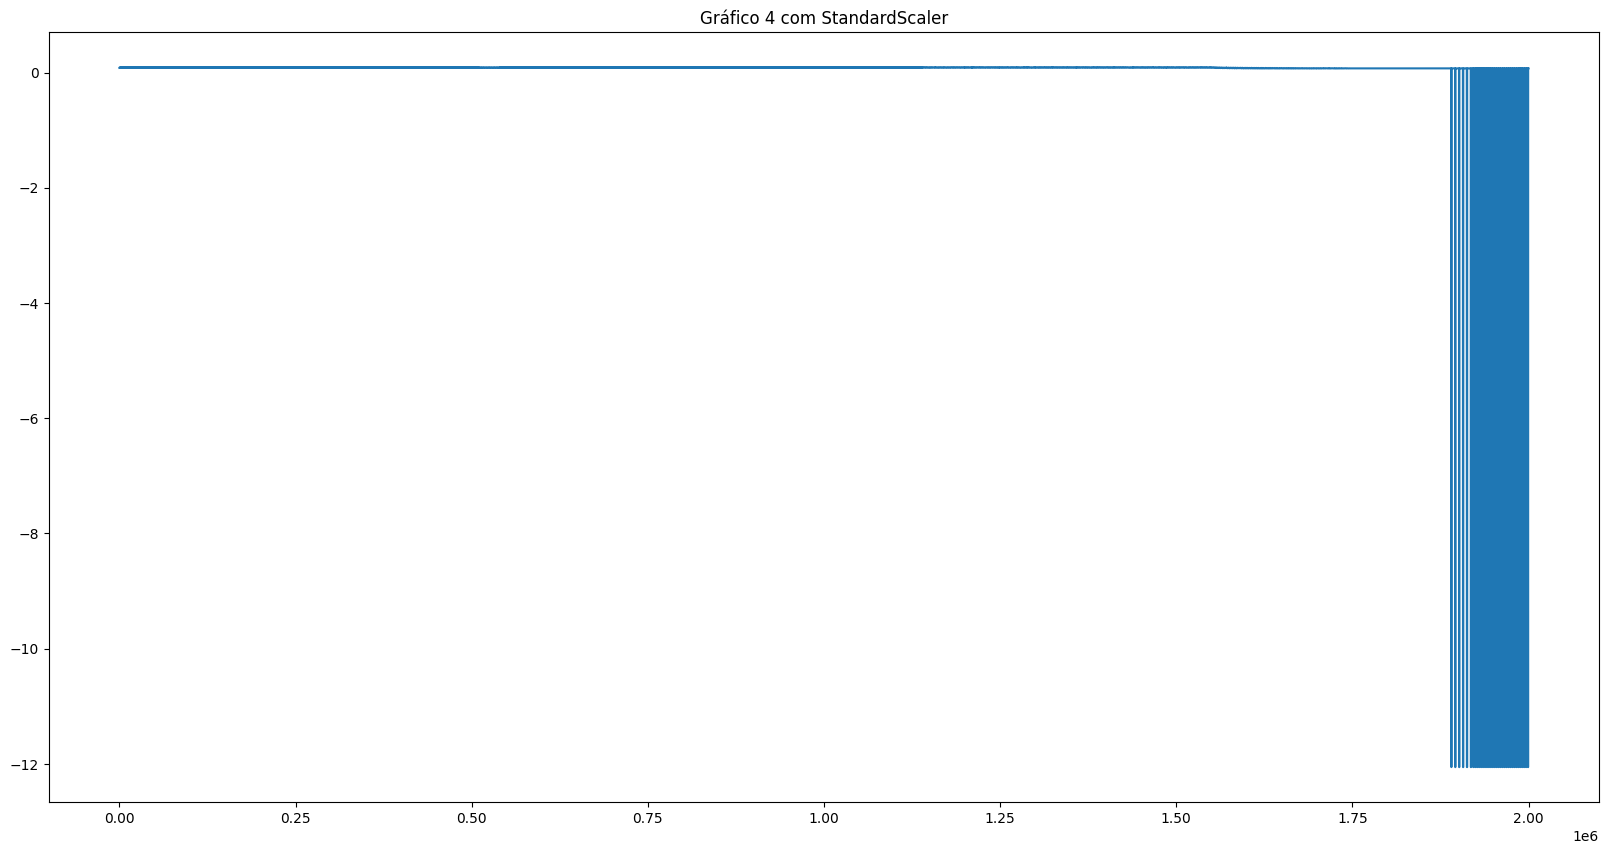

4


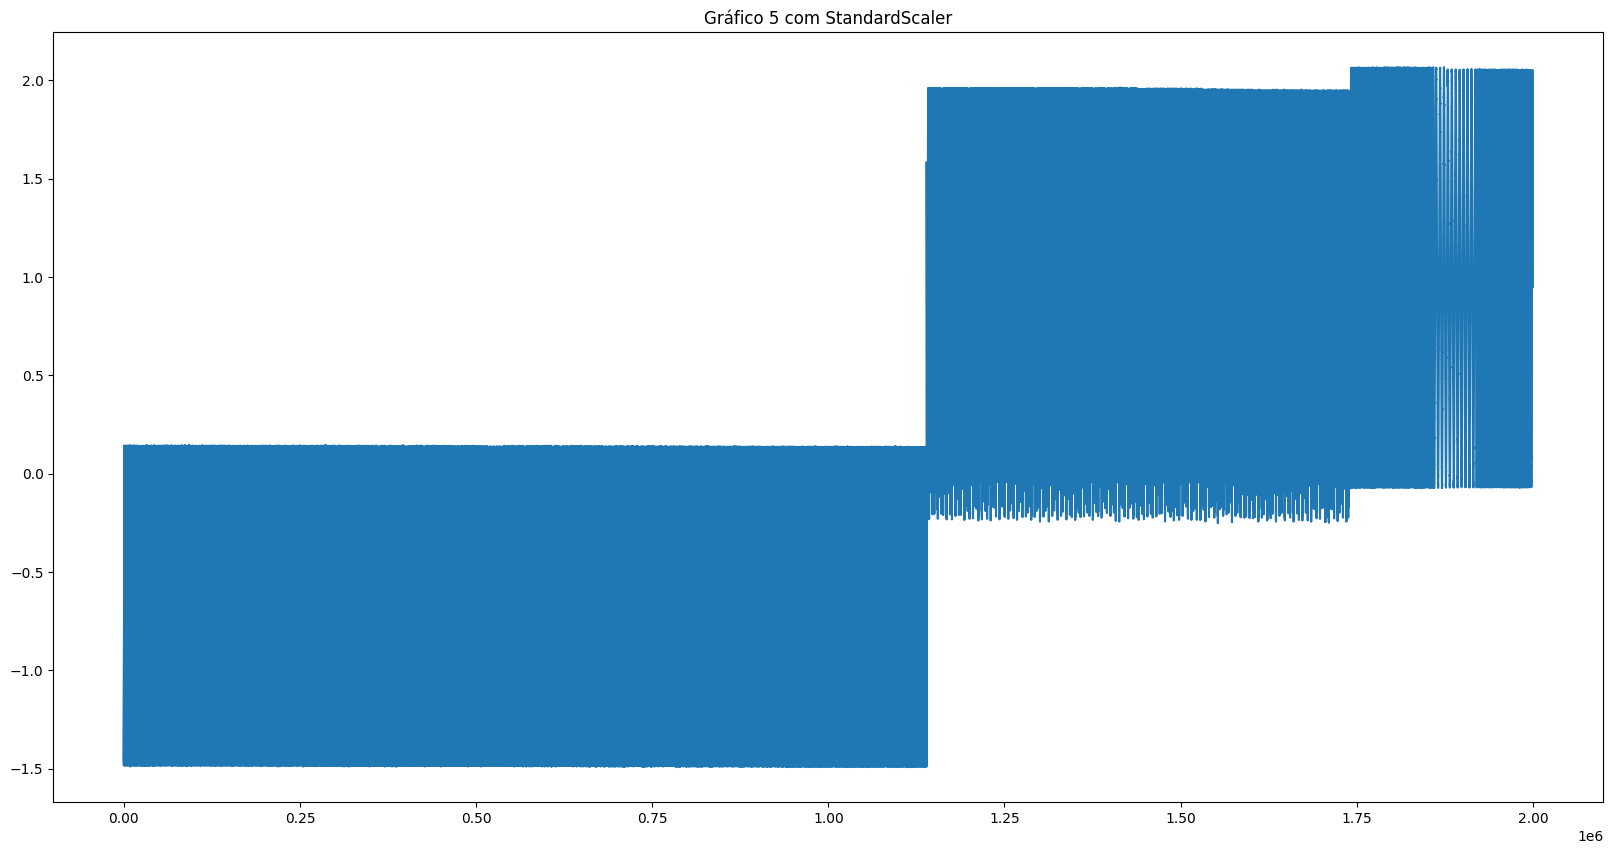

5


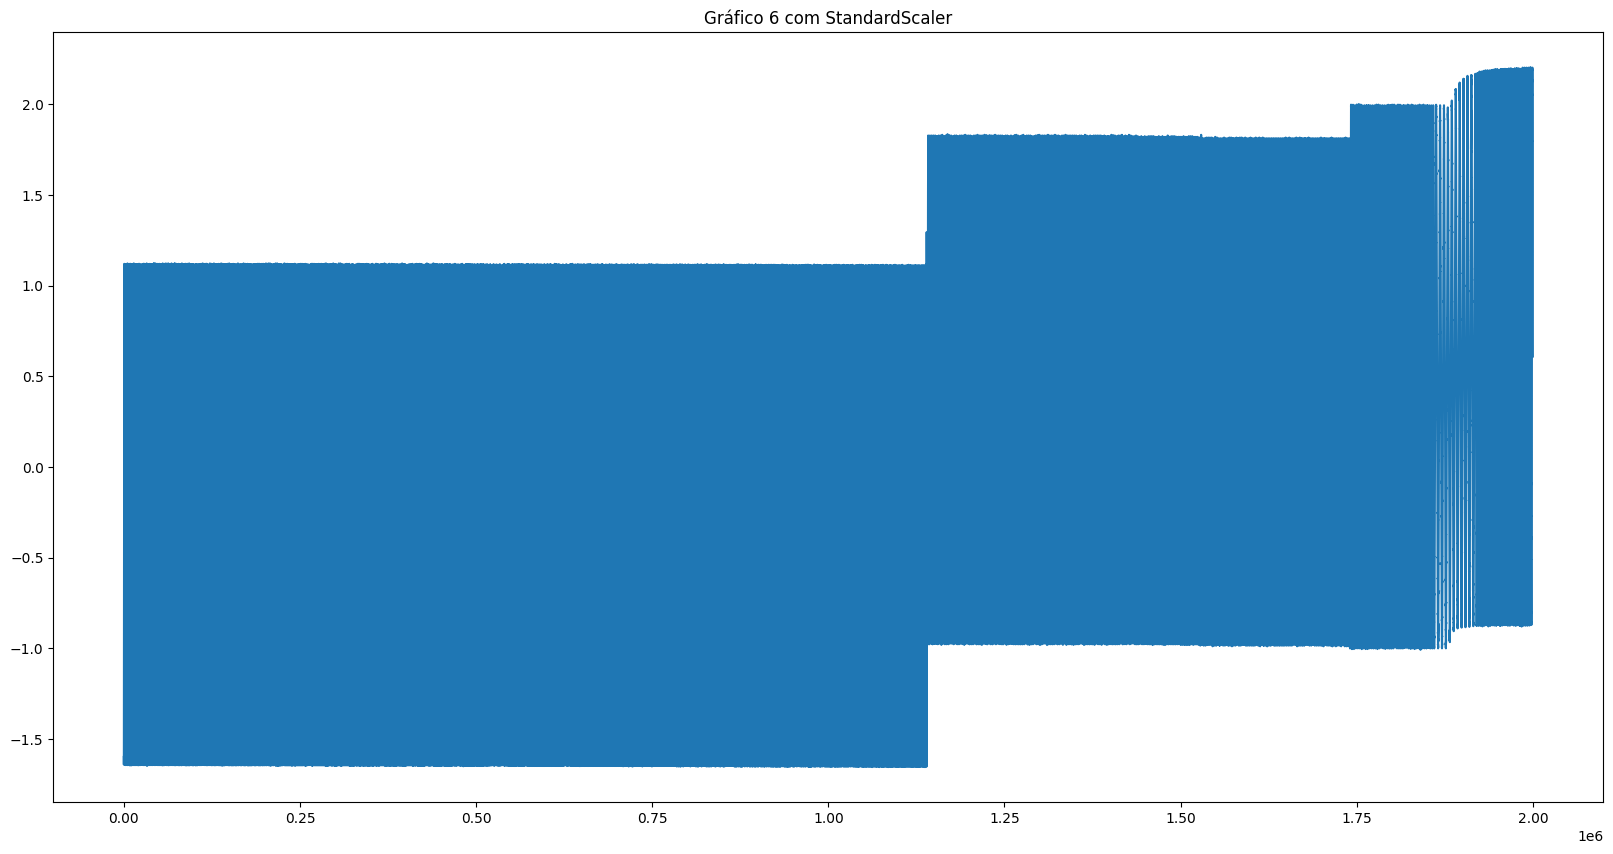

6


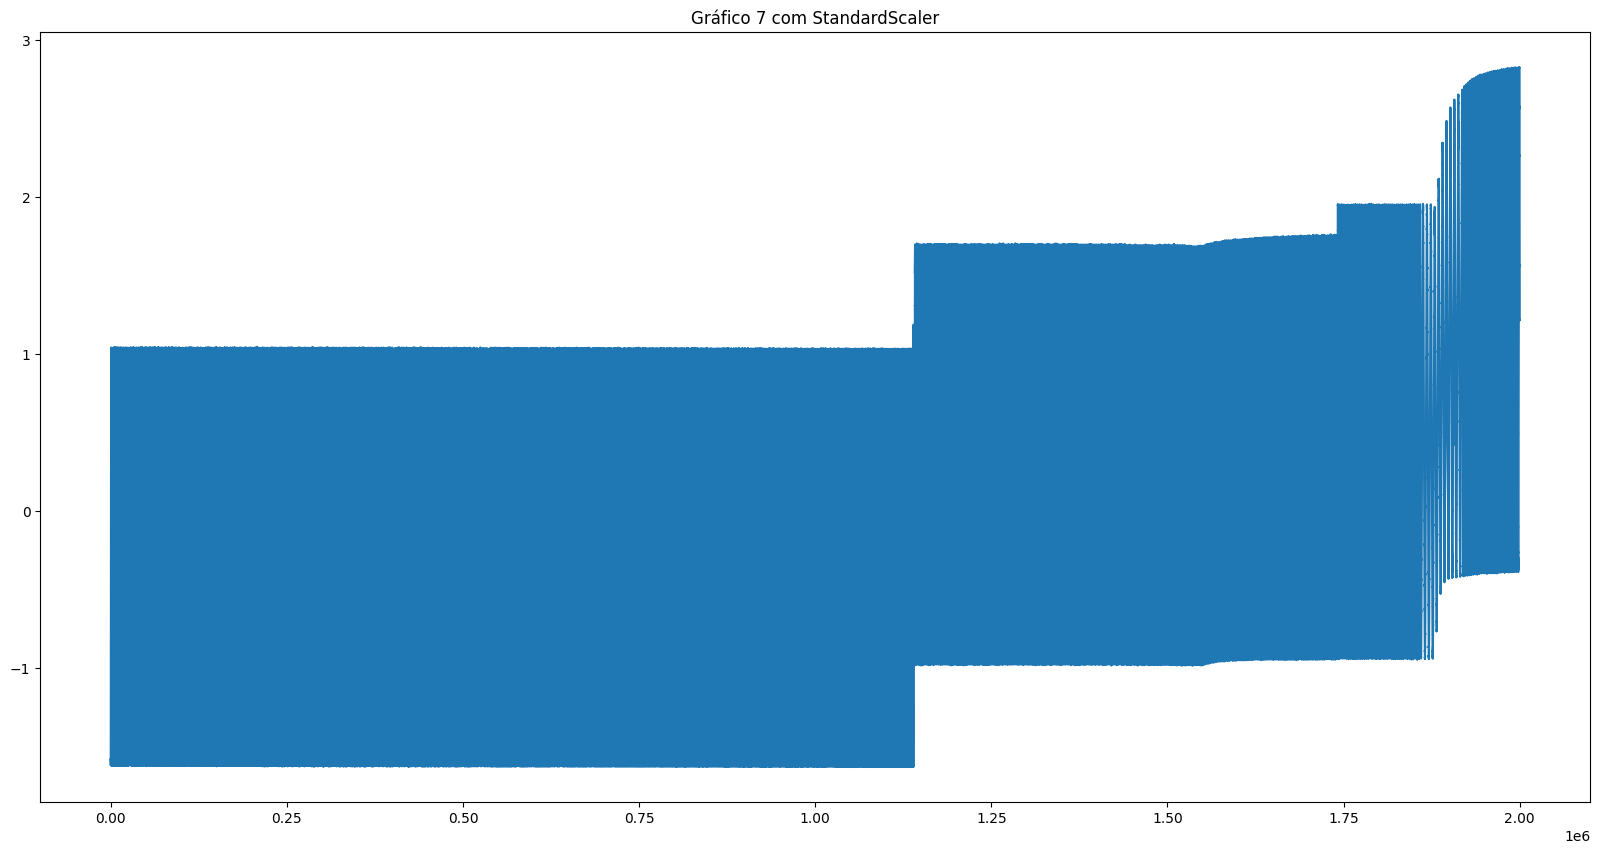

7


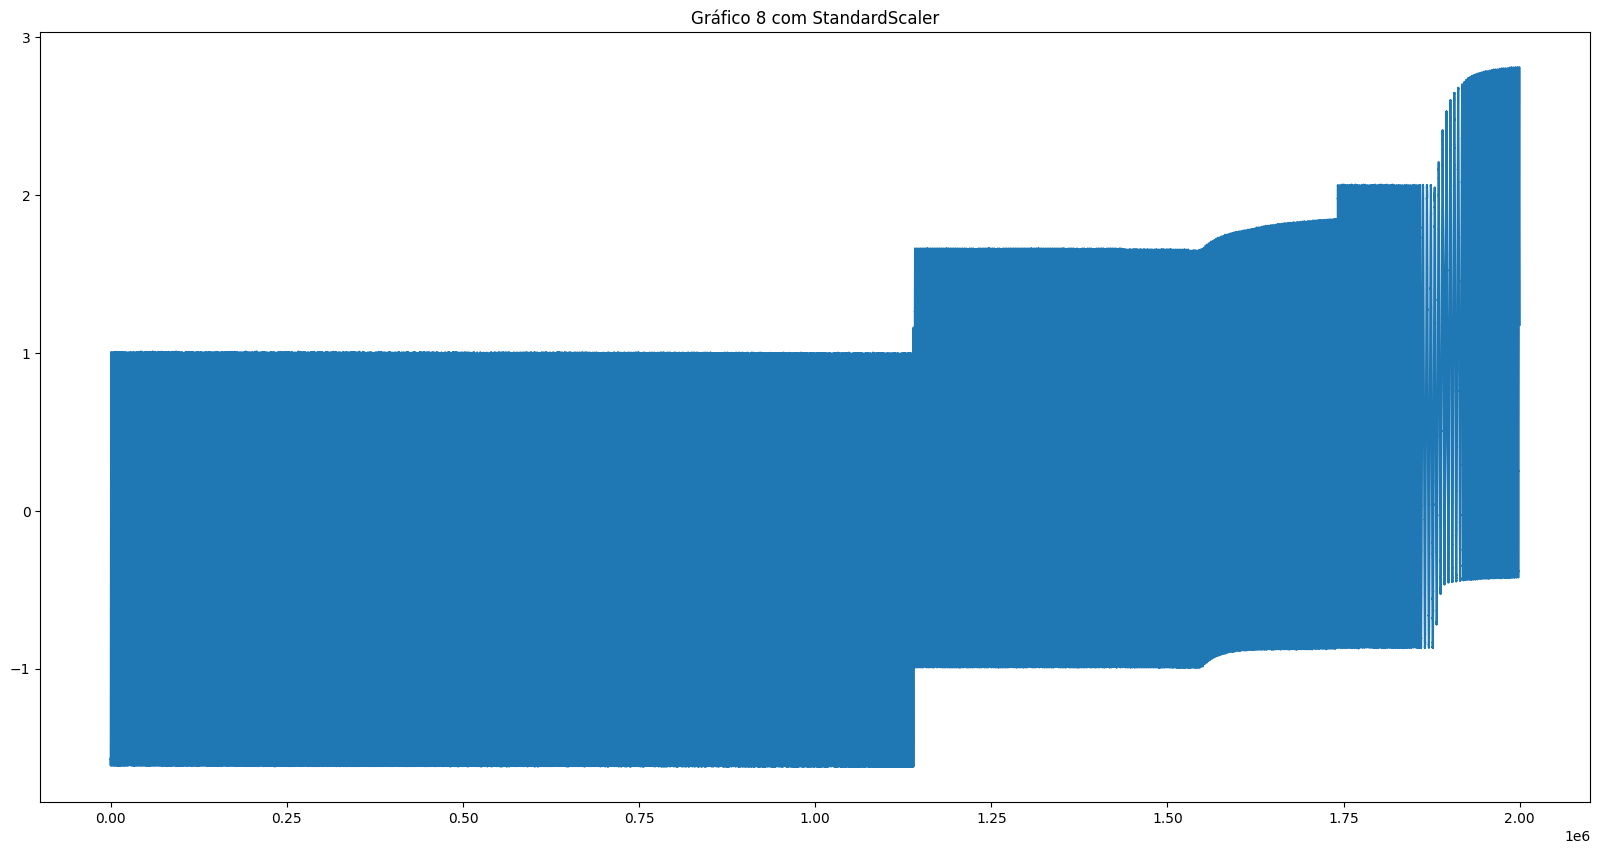

8


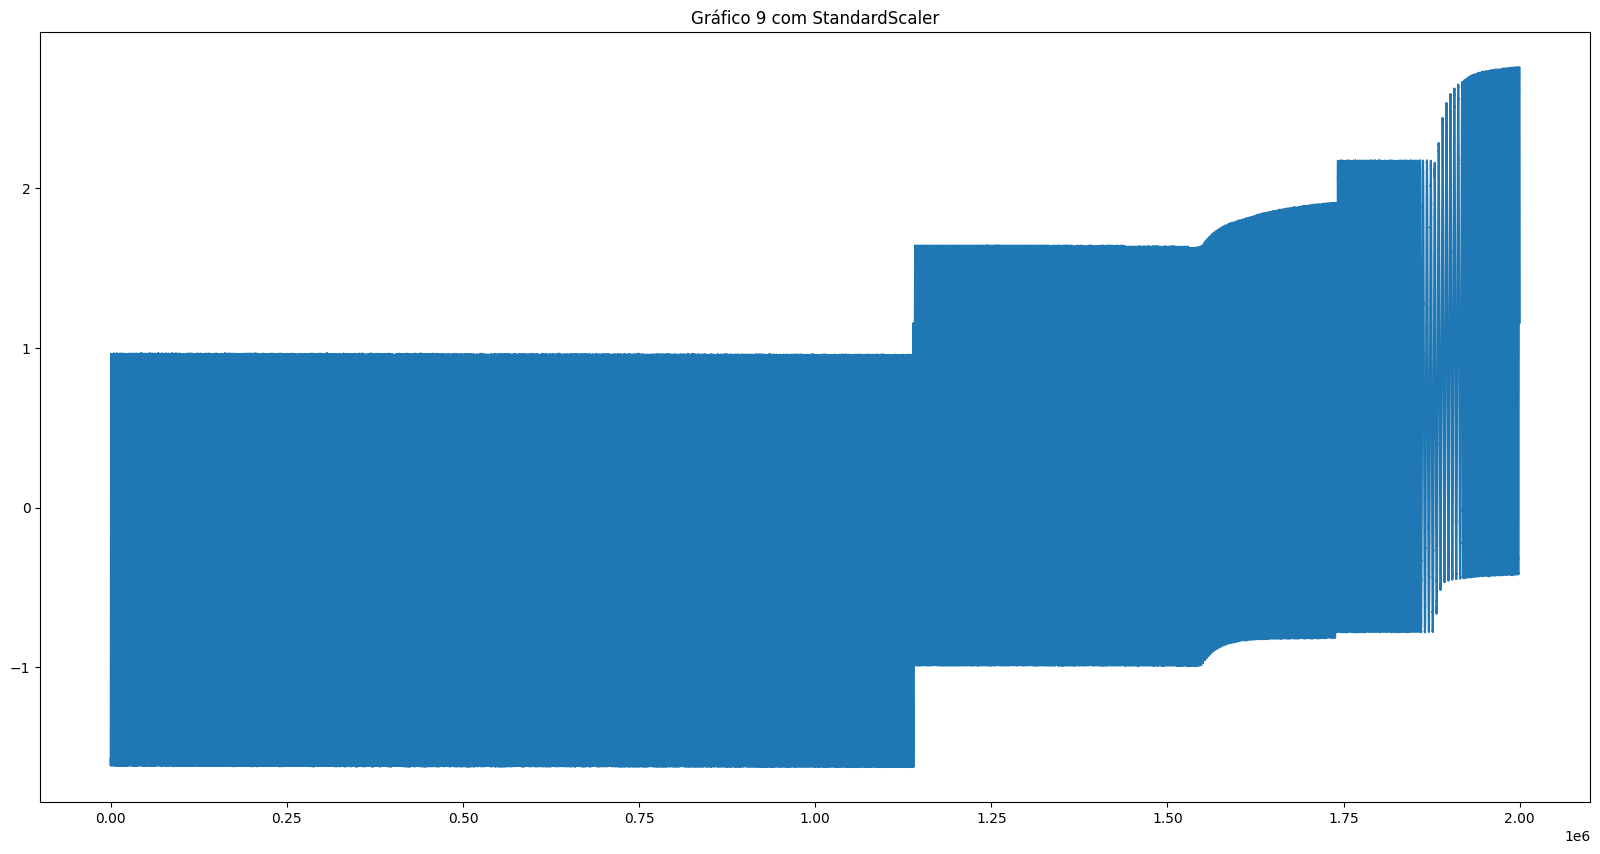

9


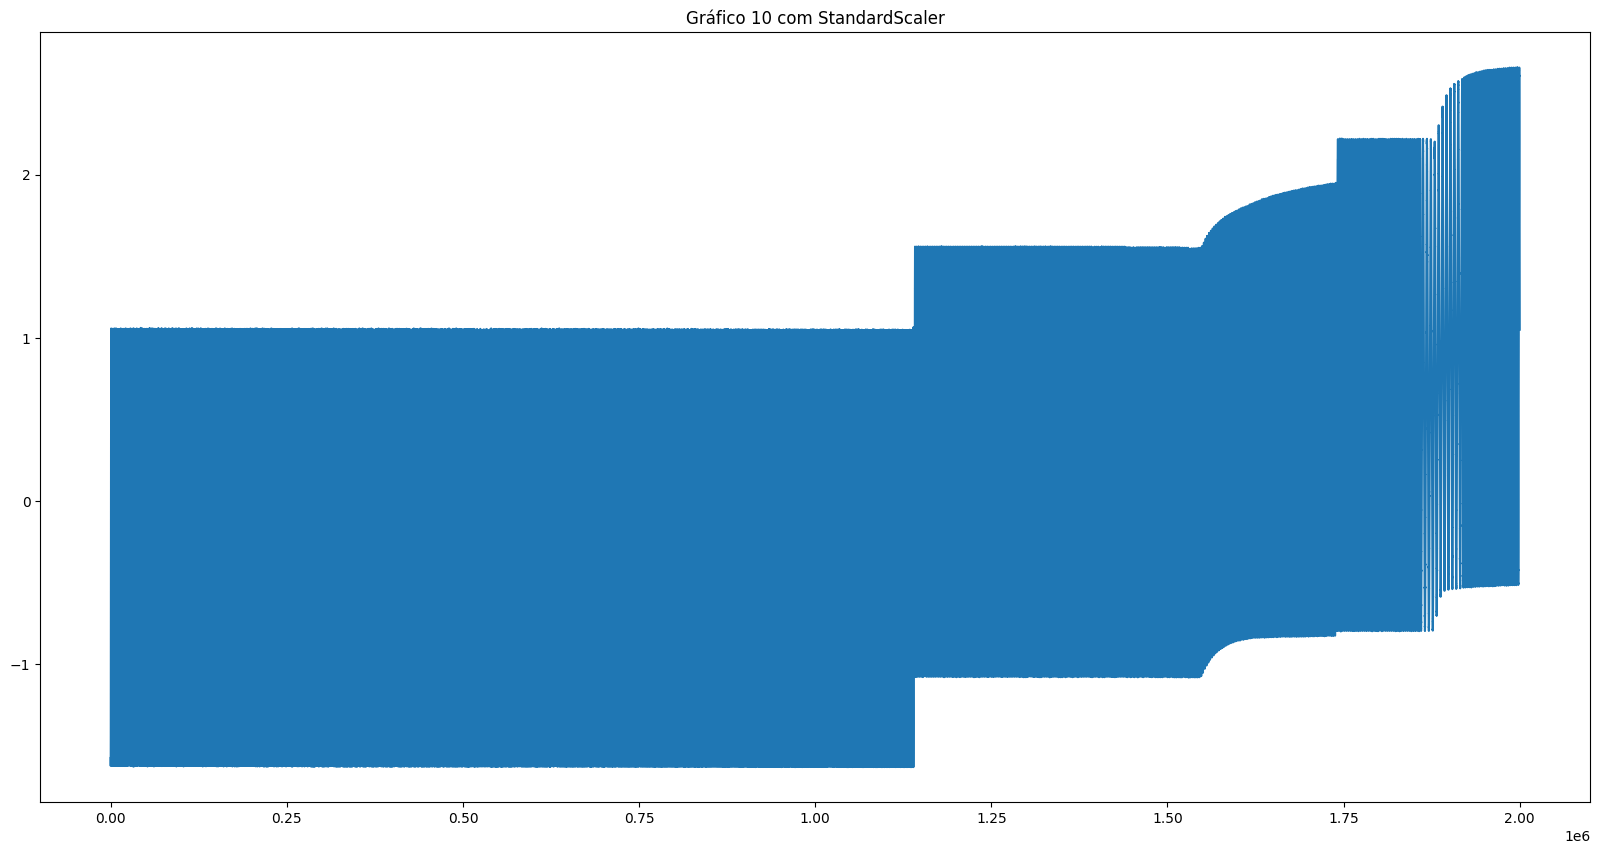

In [2]:
# compute required values
scaler = StandardScaler()
model = scaler.fit(dados)
dados_normalizados = model.transform(dados)
for i in range(0, 10):
    print(i)
    plt.figure(figsize=(20,10))
    plt.plot(dados_normalizados[:, i])
    plt.title(f'Gráfico {i+1} com StandardScaler')
    plt.show()

Notamos que em alguns dos gráficos os outliers extrapolam em muito a média, mantendo a caracterísita dos outliers mesmo após a normalização.

### 2.1 Usando MinMaxScaler

Este Scaler dimensiona e *traduz* cada recurso individualmente, de modo que esteja no intervalo determinado no conjunto de treinamento, por exemplo. entre zero e um.

0


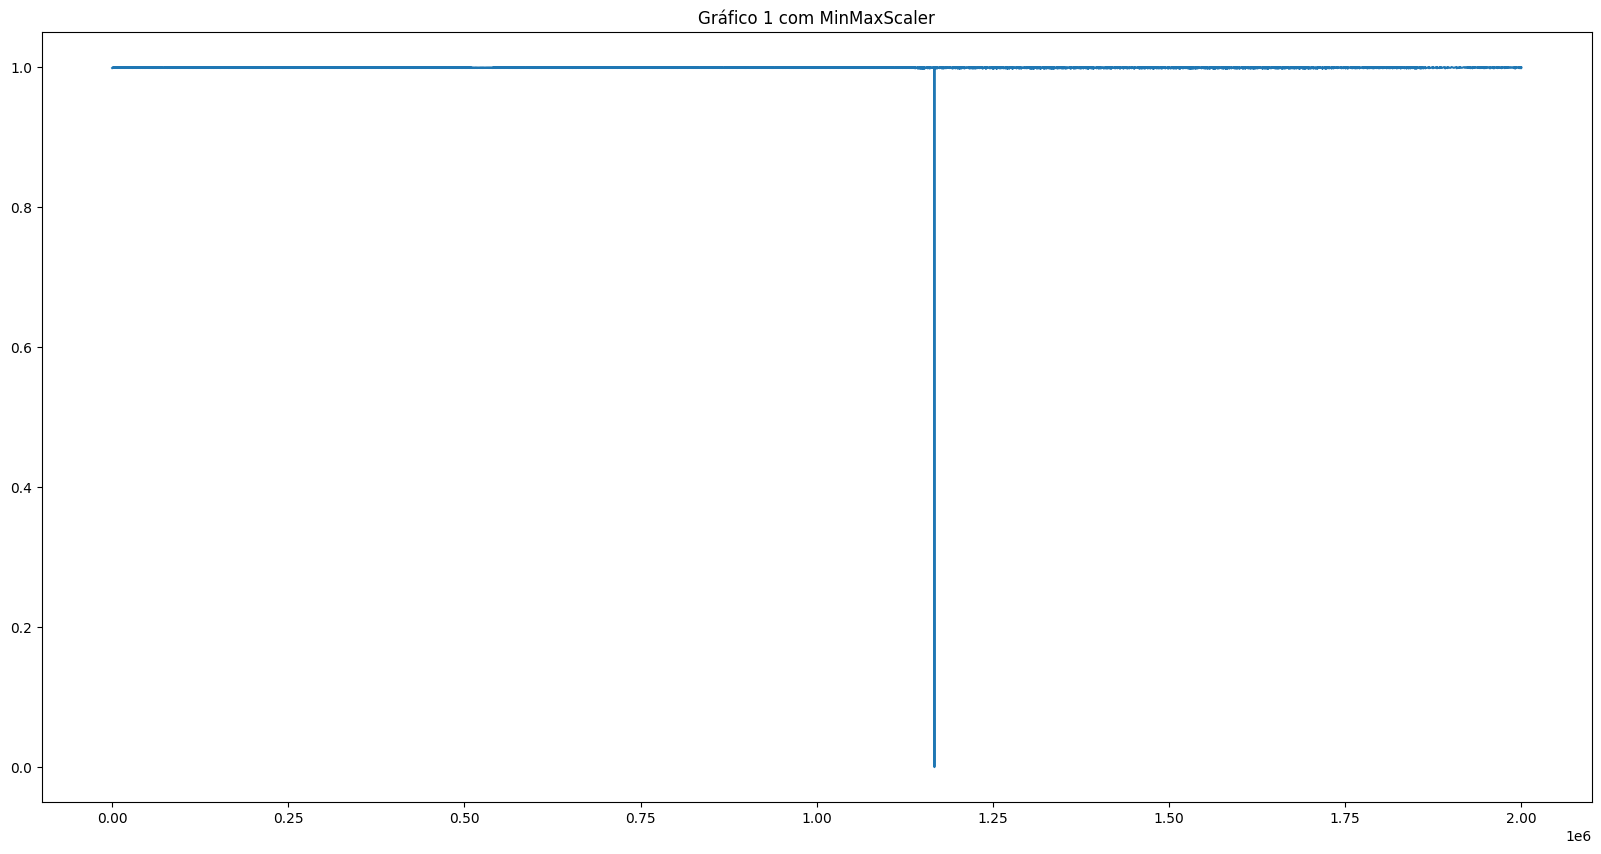

1


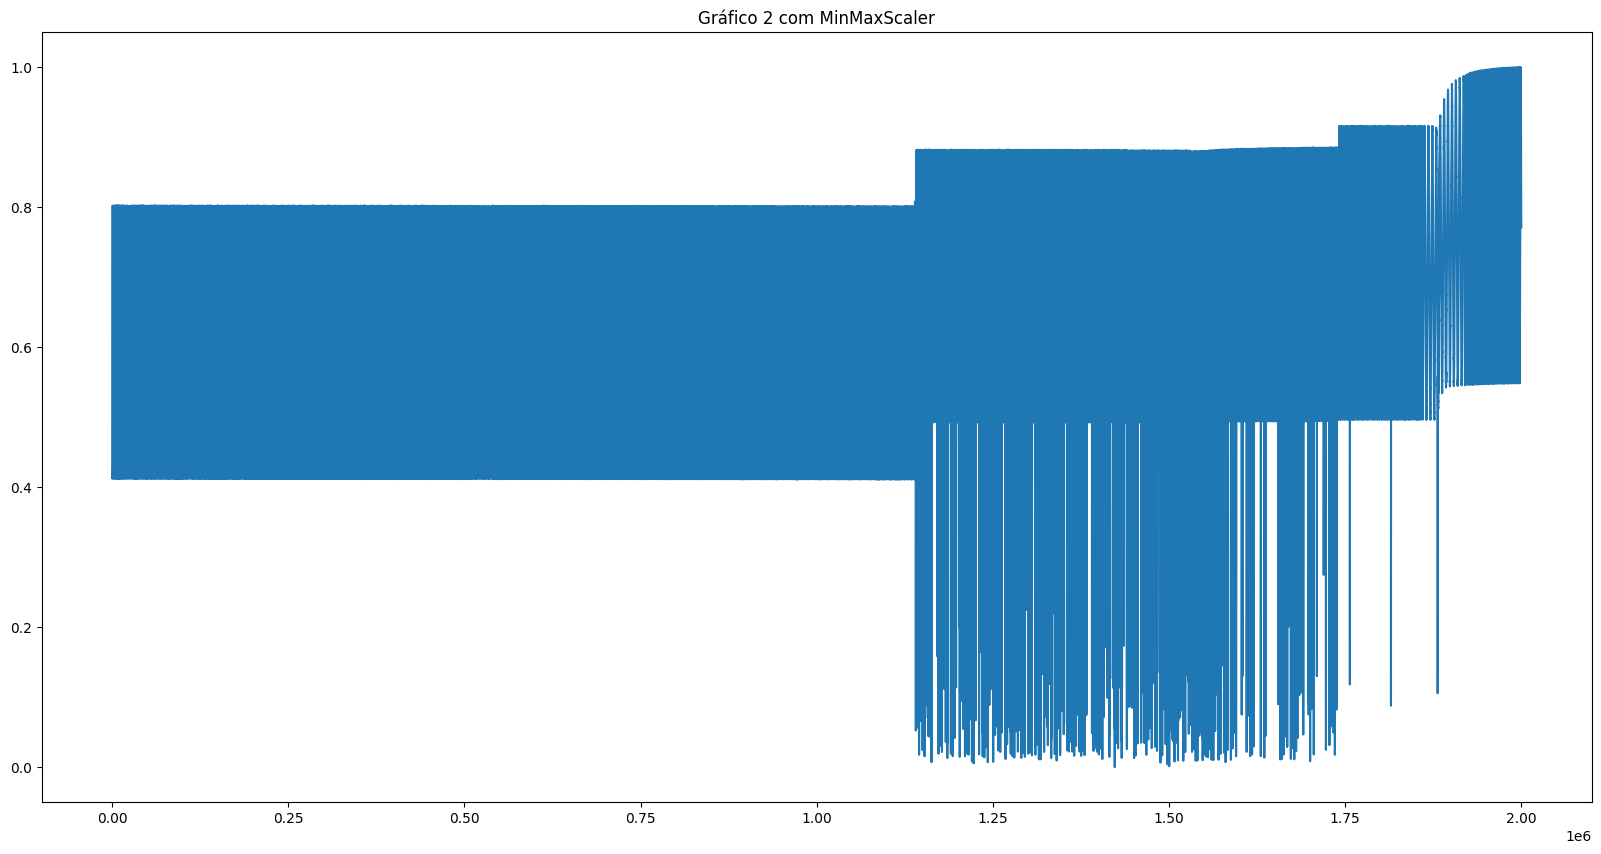

2


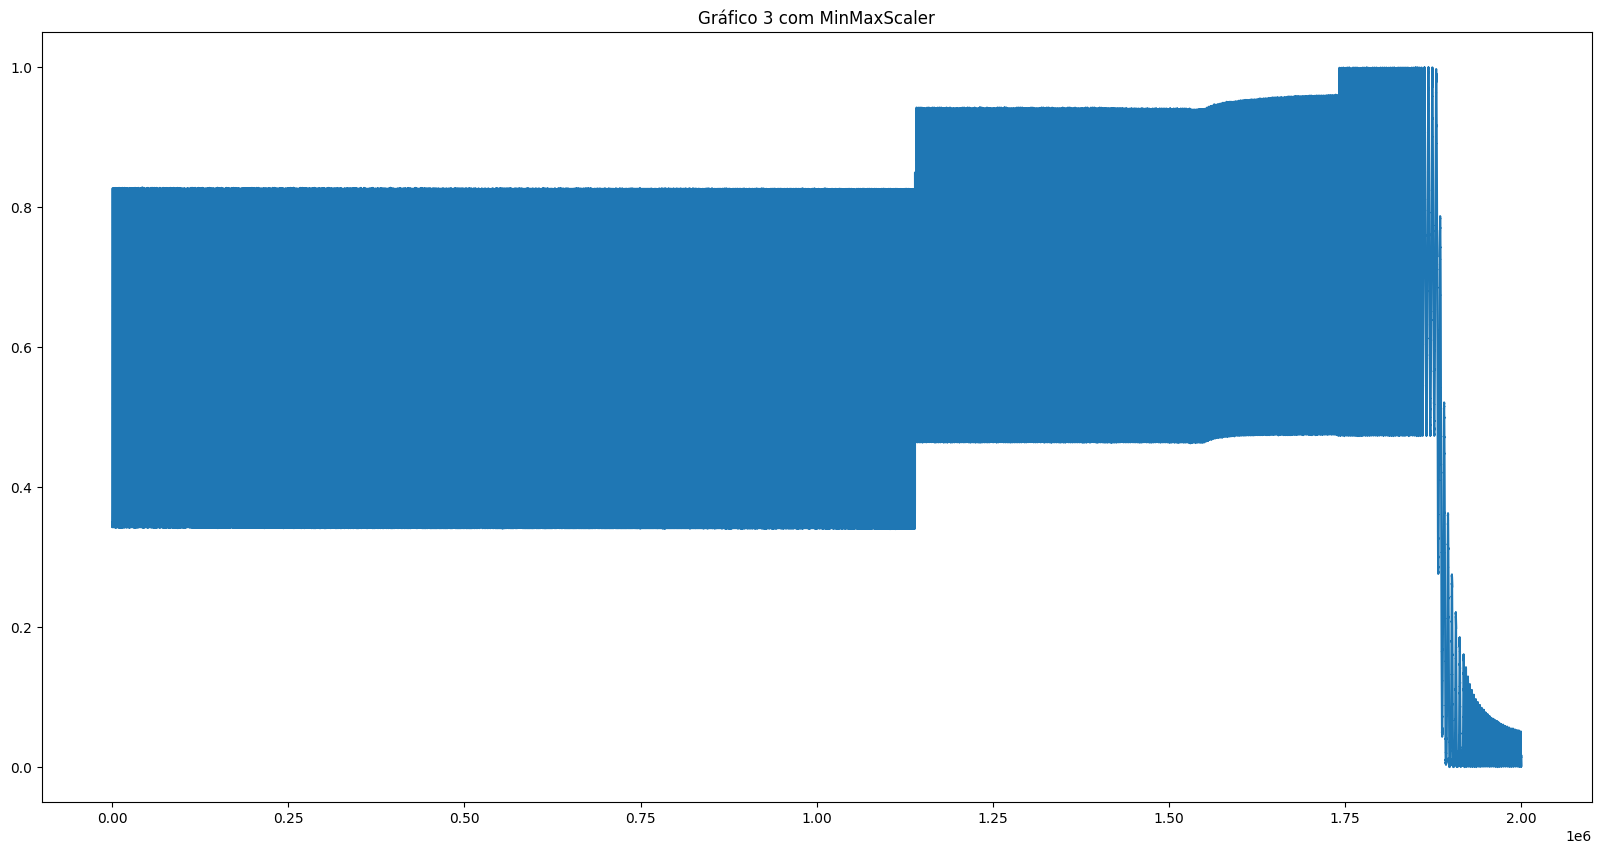

3


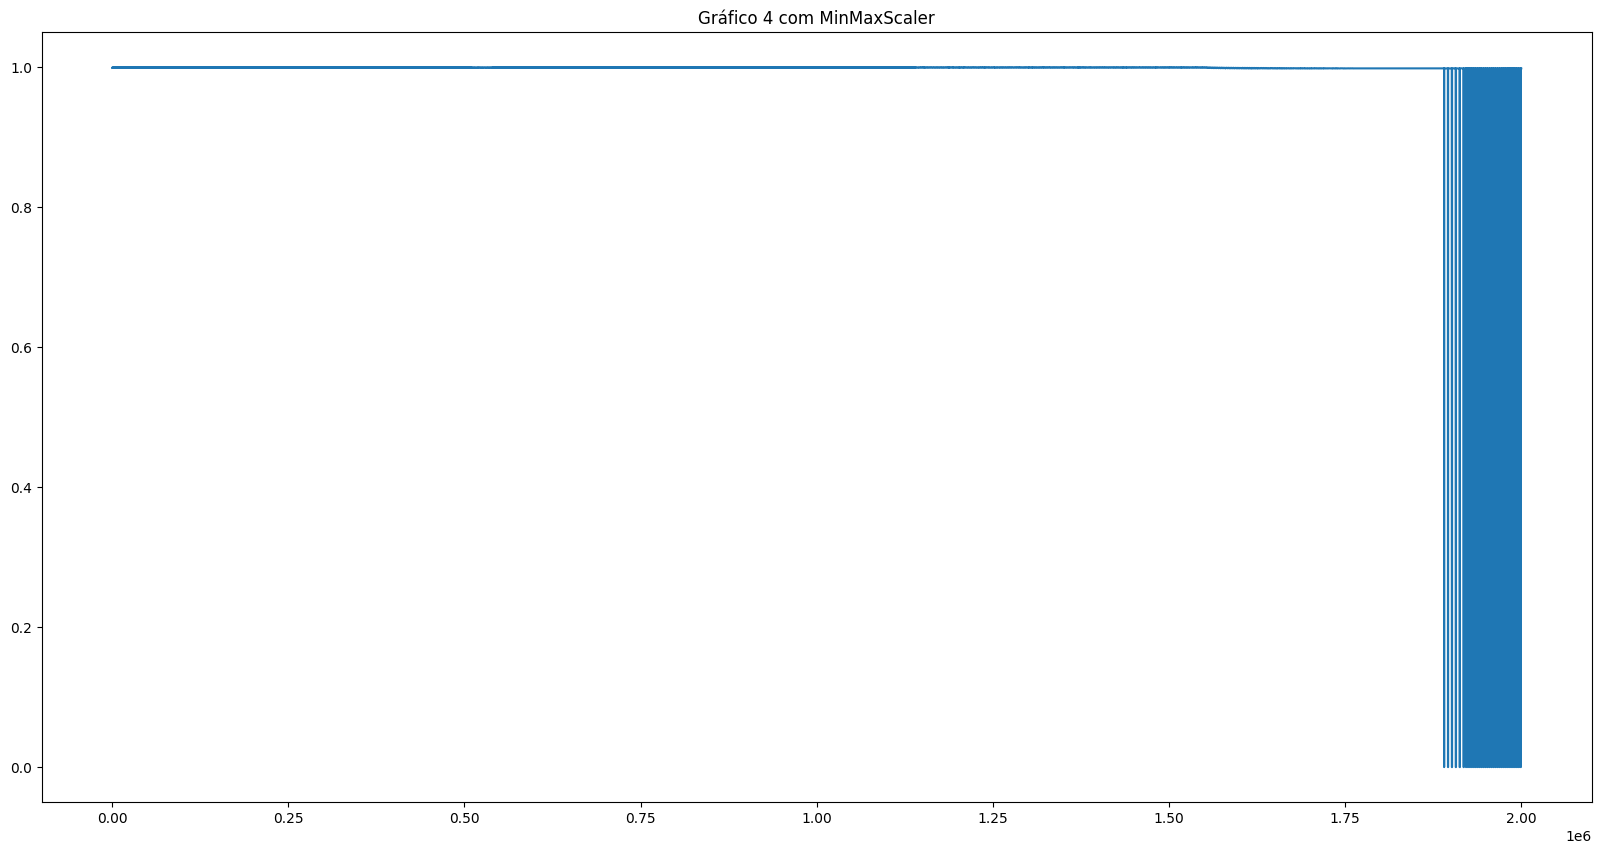

4


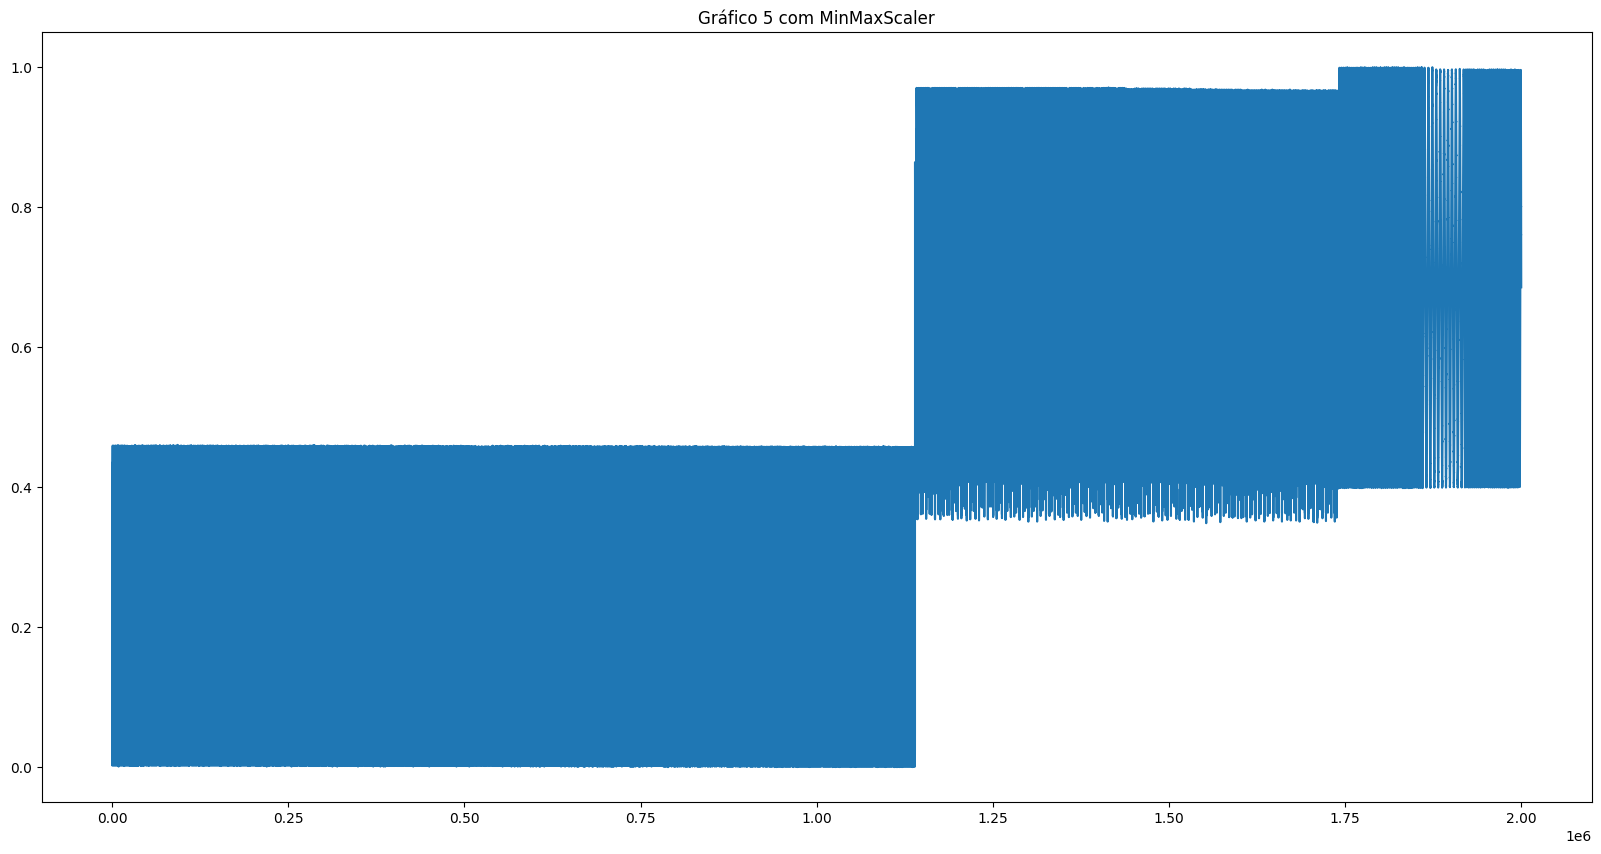

5


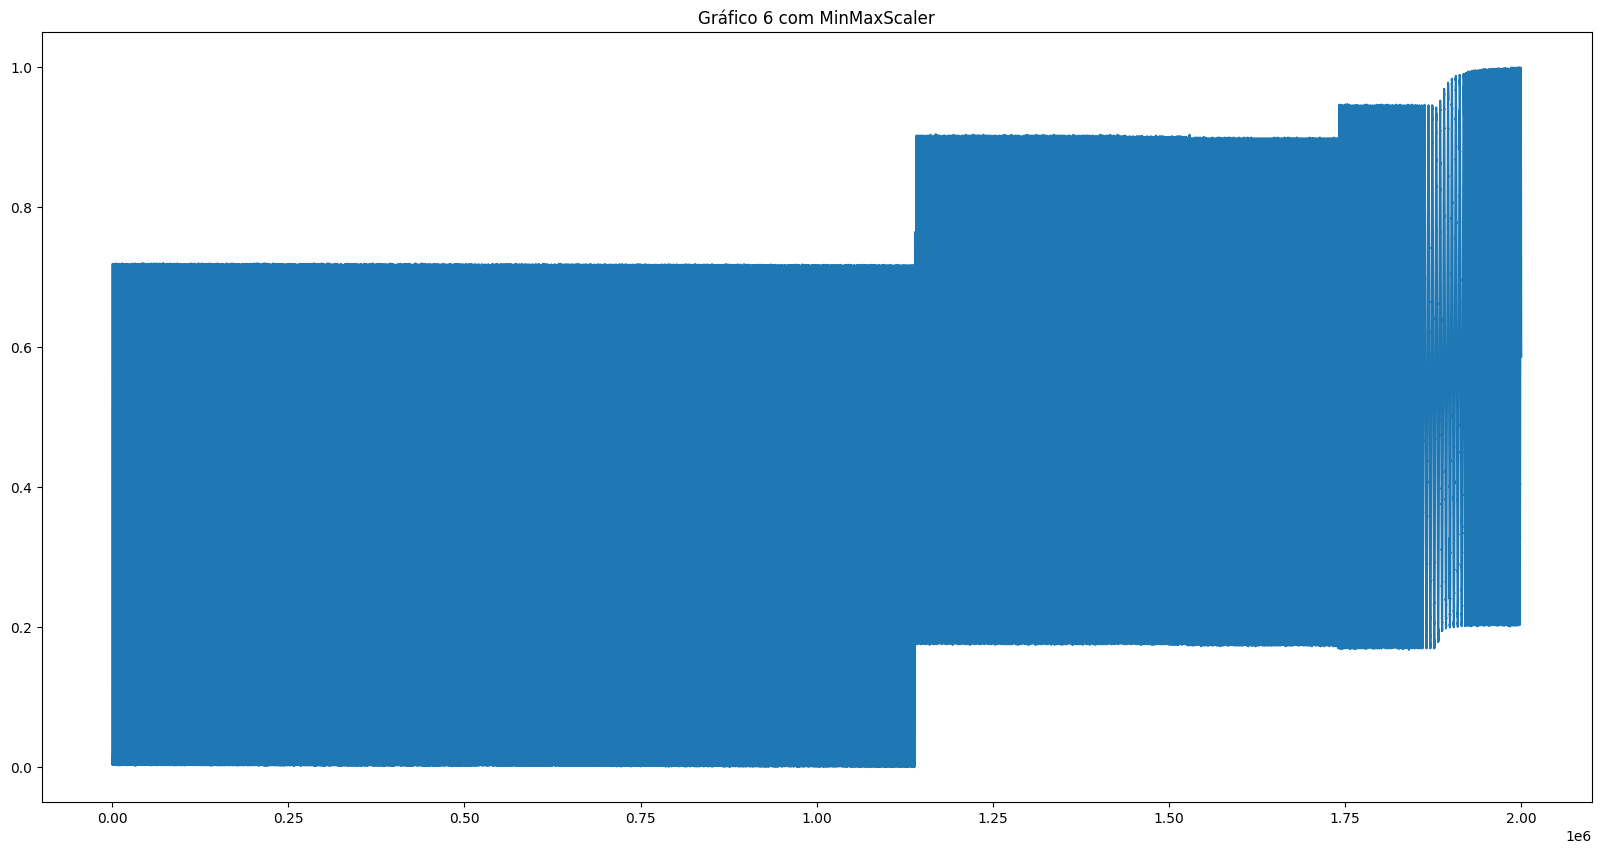

6


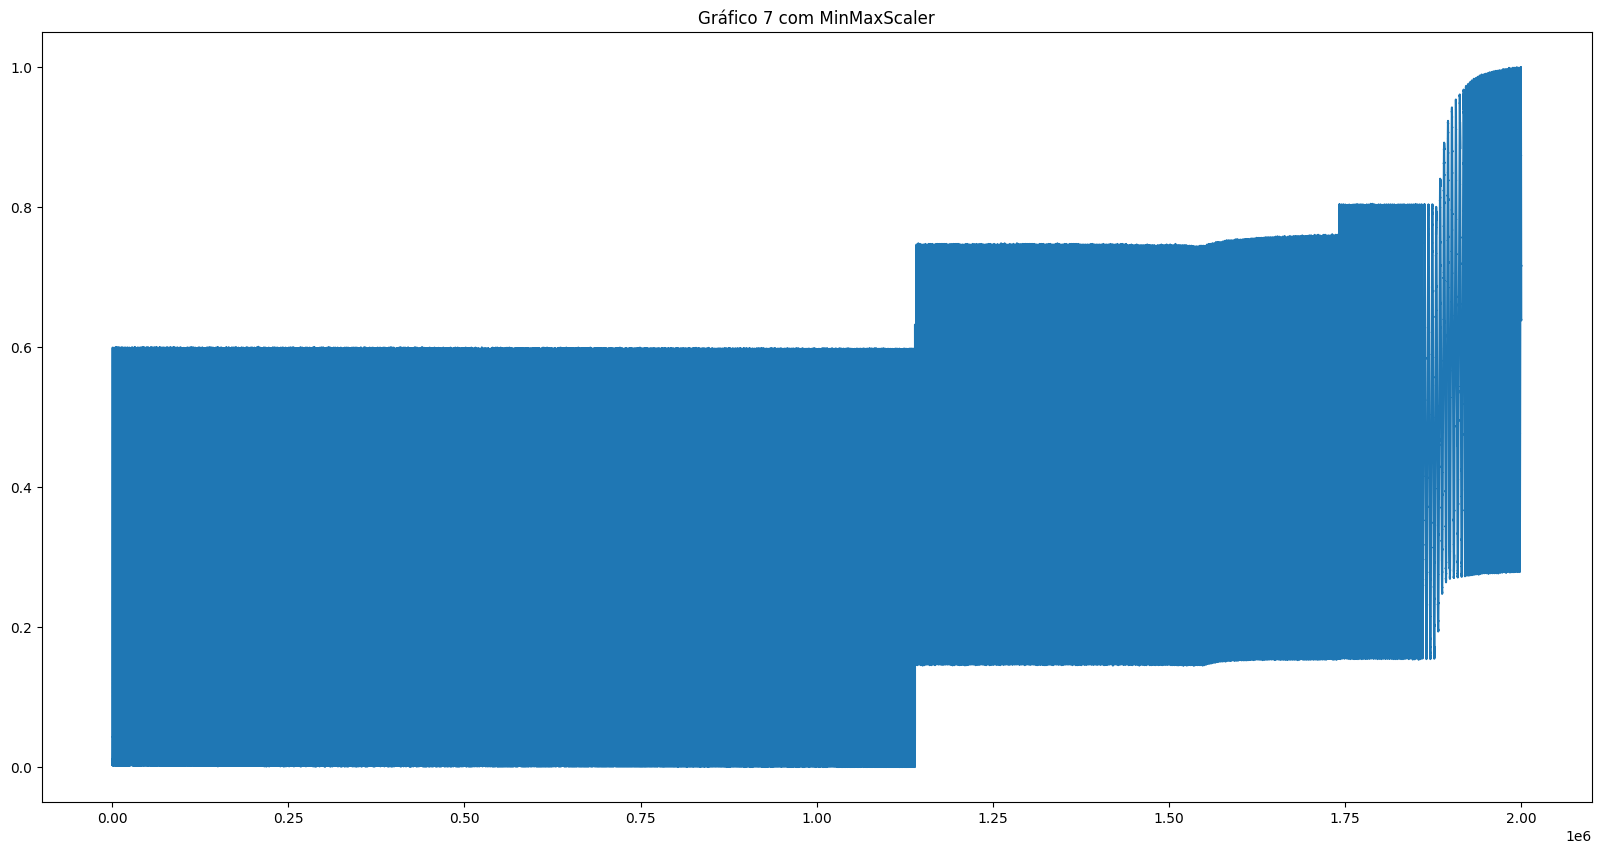

7


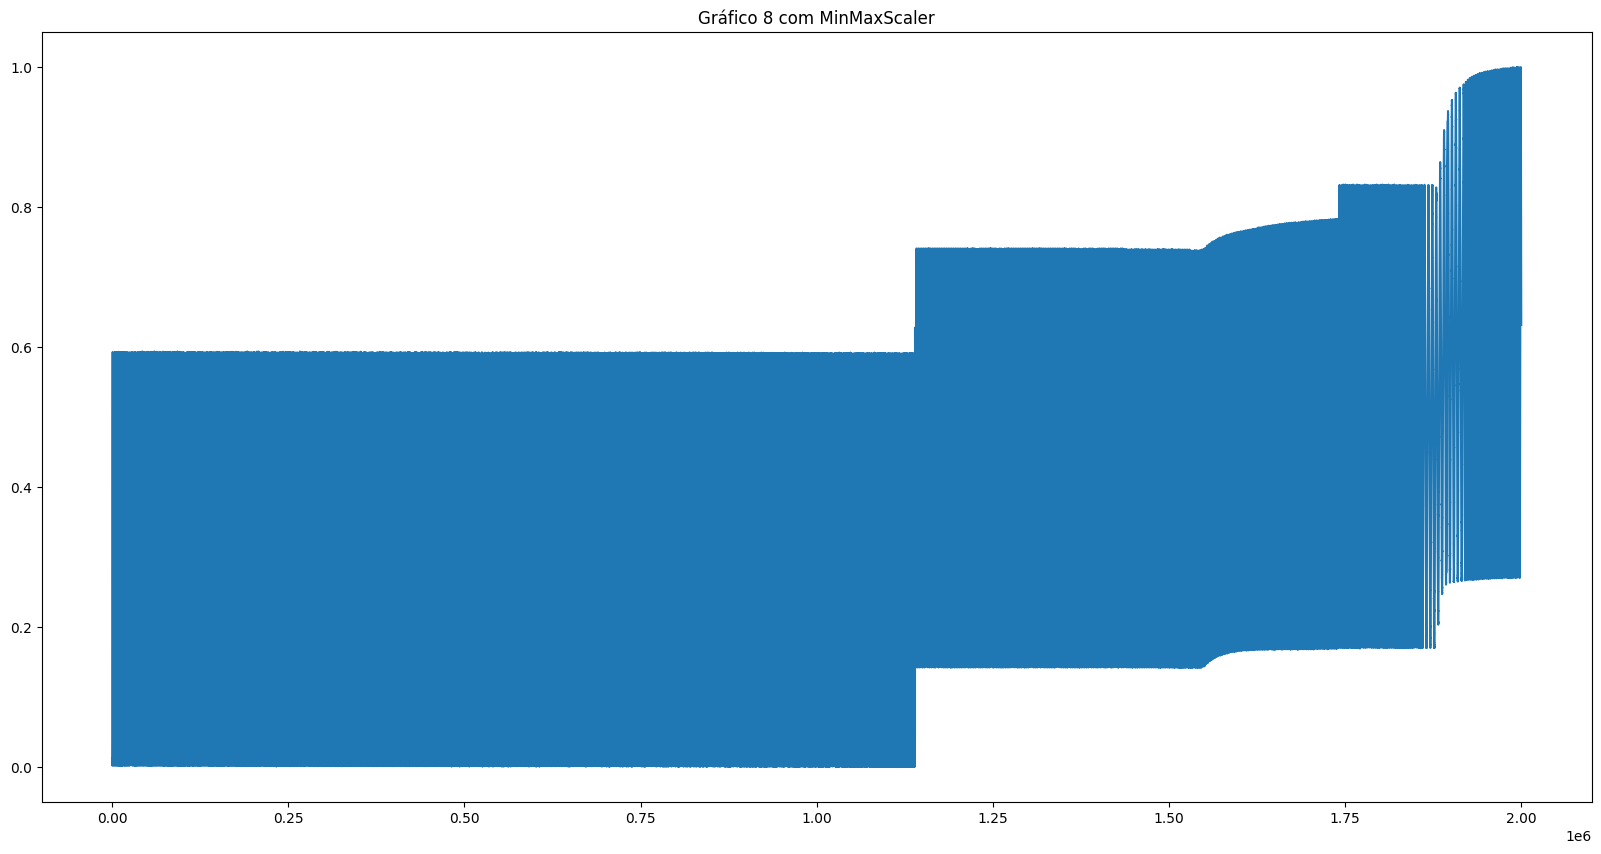

8


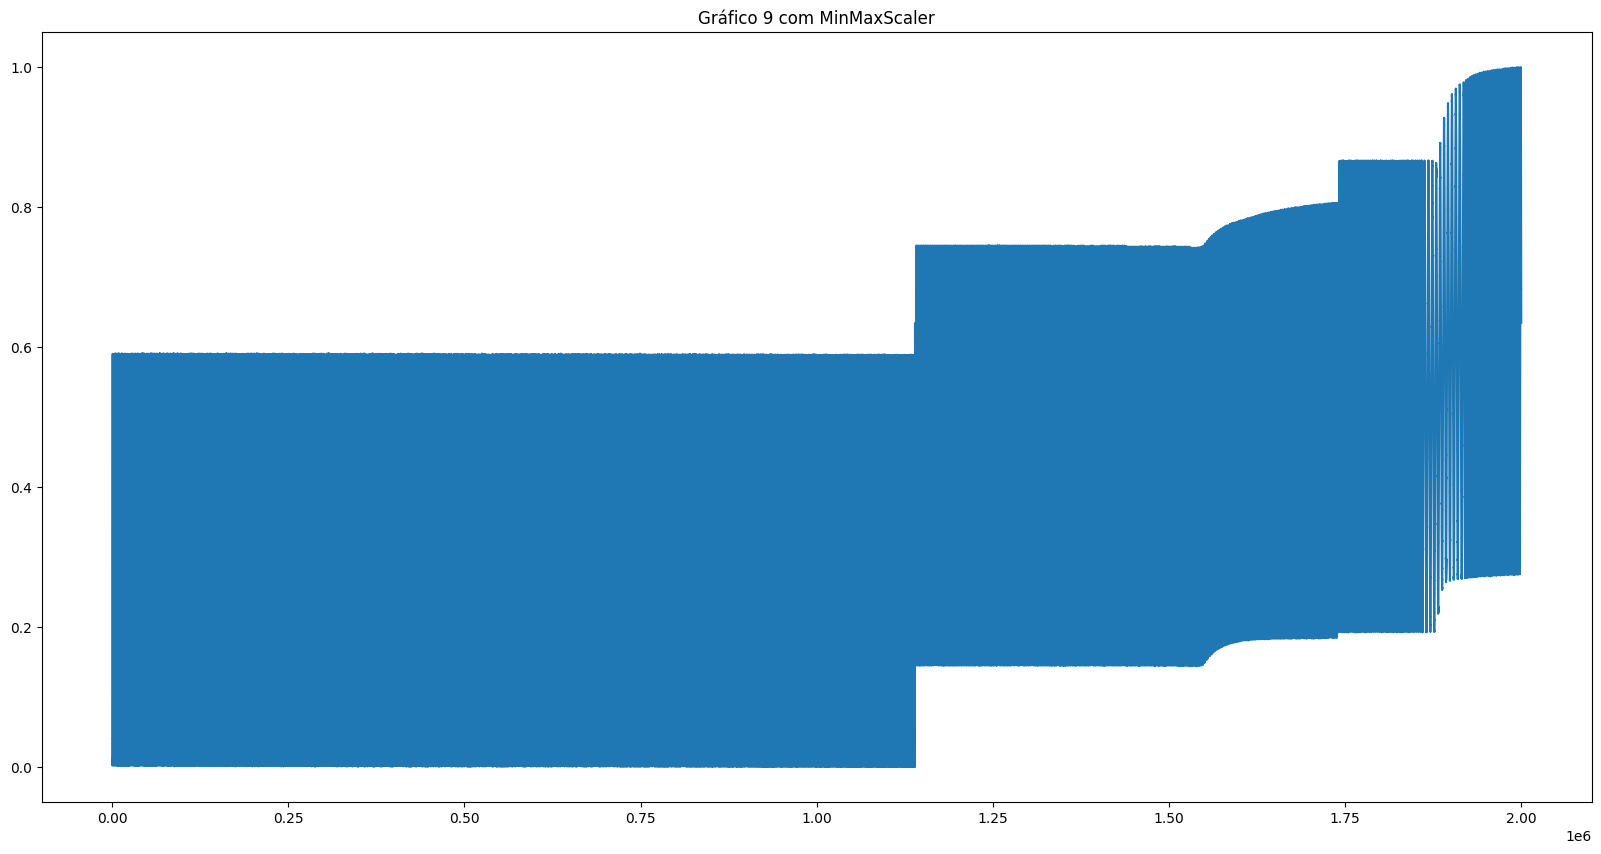

9


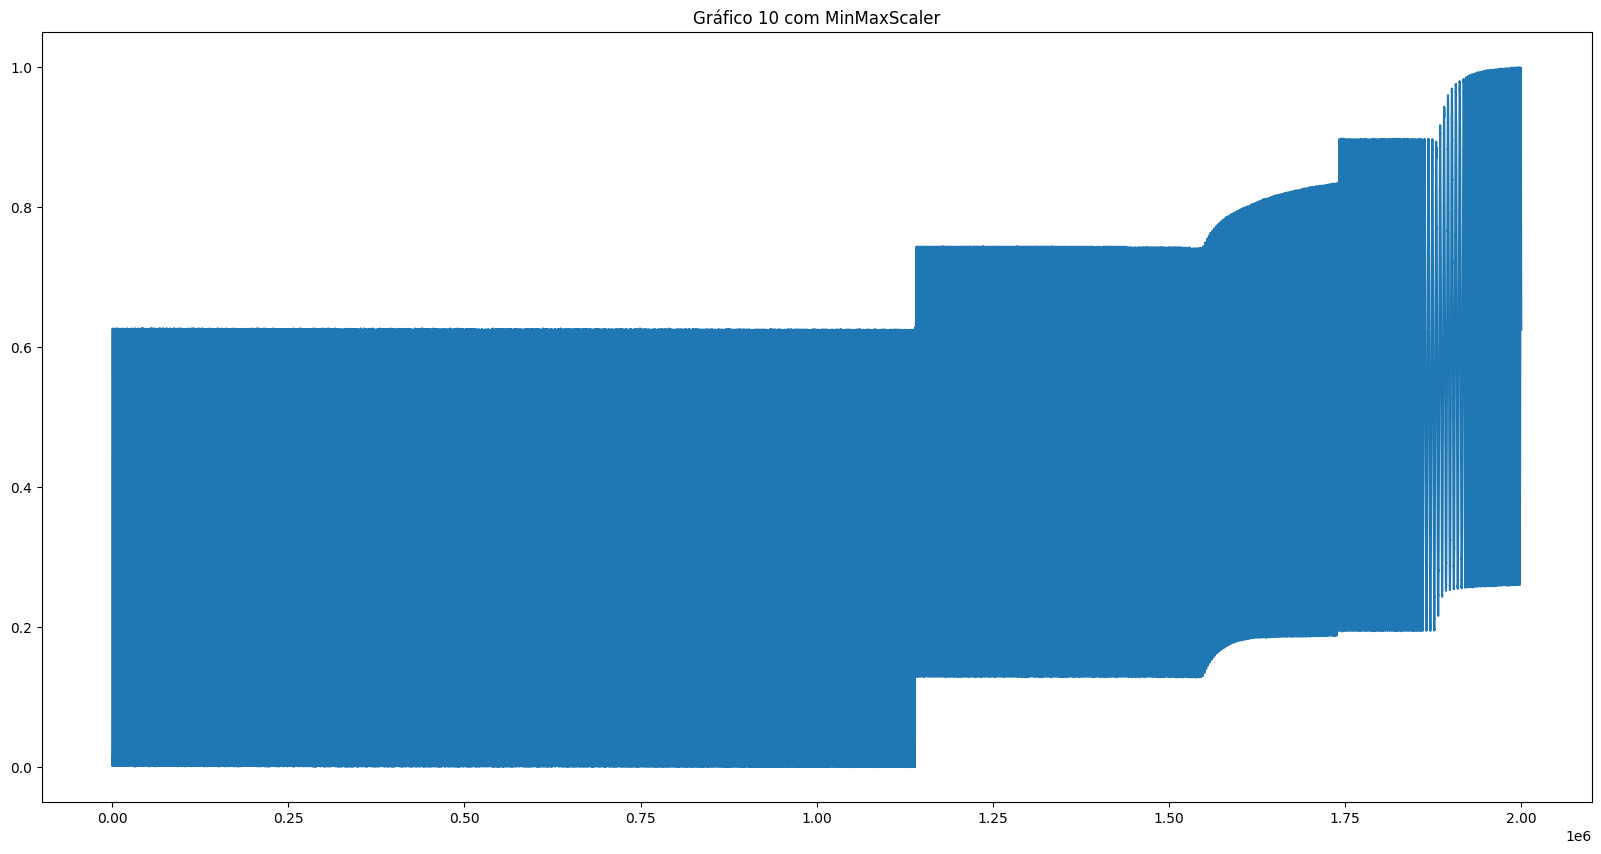

In [3]:
scaler = MinMaxScaler()
model = scaler.fit(dados)
dados_normalizados = model.transform(dados)
for i in range(0, 10):
    print(i)
    plt.figure(figsize=(20,10))
    plt.plot(dados_normalizados[:, i])
    plt.title(f'Gráfico {i+1} com MinMaxScaler')
    plt.show()

Vemos que o MinMaxScaler teve um efeito similar, com gráfico quase idêntico ao do StandardScaler, porém com uma escala diferente com valores sempre entre 1 e 0, o que pode levar a uma perda de informação com valores de entrada muito distantes da média. No geral, os outliers ficaram próximo do 0, com a perda de informação de seu valor absurdamente alto, mas no gráfico 5 ficou próximo da média

### 2.2 Usando RobustScaler

Este Scaler remove a mediana e dimensiona os dados de acordo com o intervalo quantílico (o padrão é IQR: intervalo interquartil). O IQR é o intervalo entre o 1º quartil (25º quantil) e o 3º quartil (75º quantil).

A centralização e o dimensionamento acontecem independentemente de cada recurso, calculando as estatísticas relevantes nas amostras do conjunto de treinamento. A mediana e o intervalo interquartil são então armazenados para serem usados em dados posteriores usando o método de transformação.

0


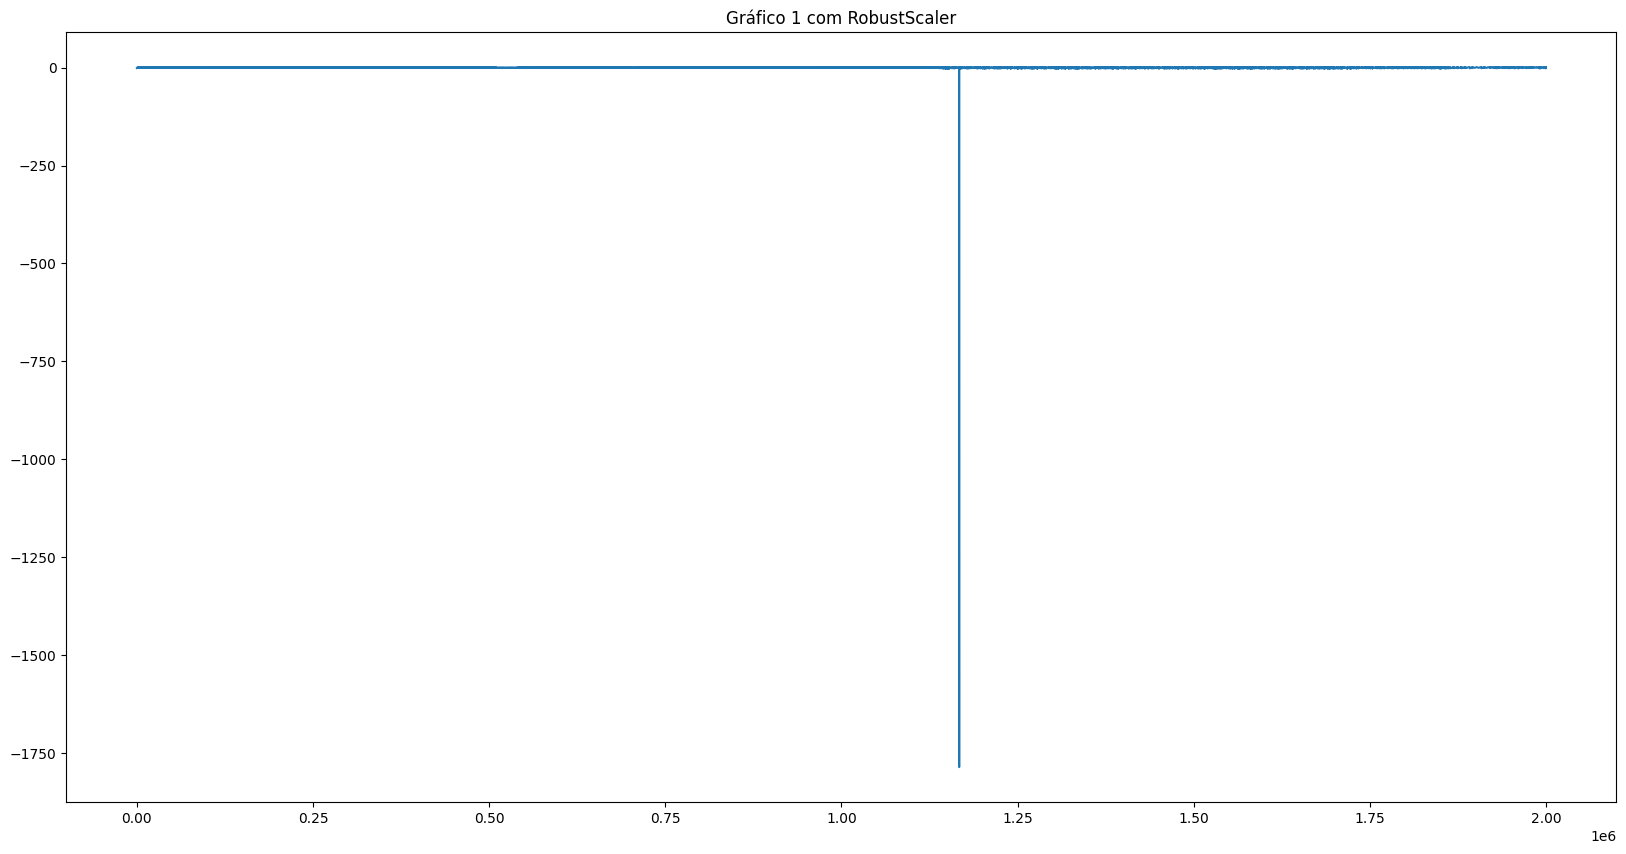

1


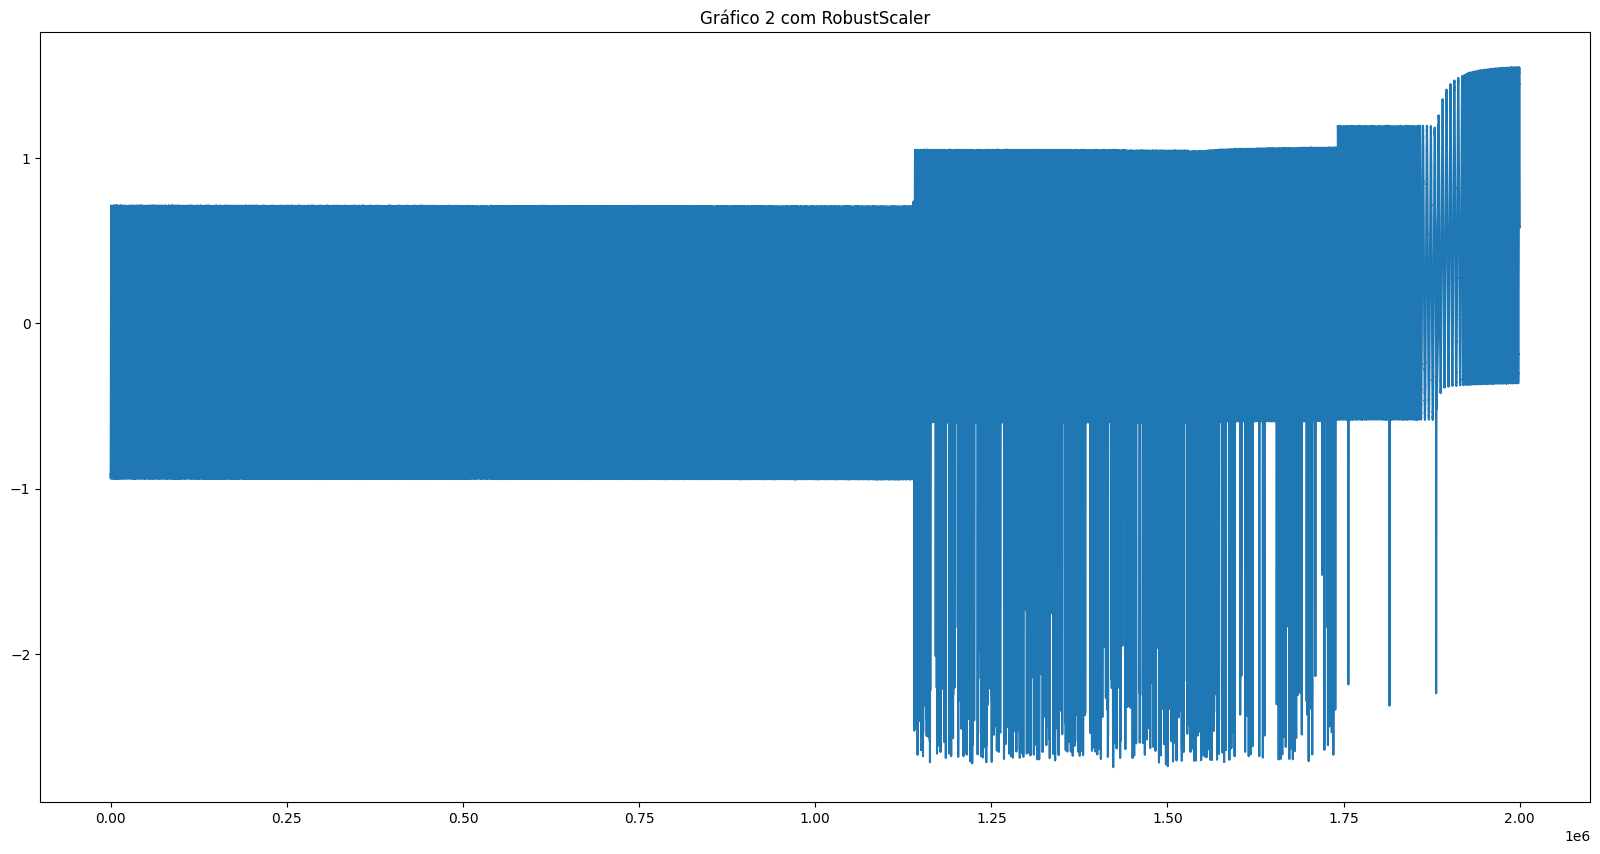

2


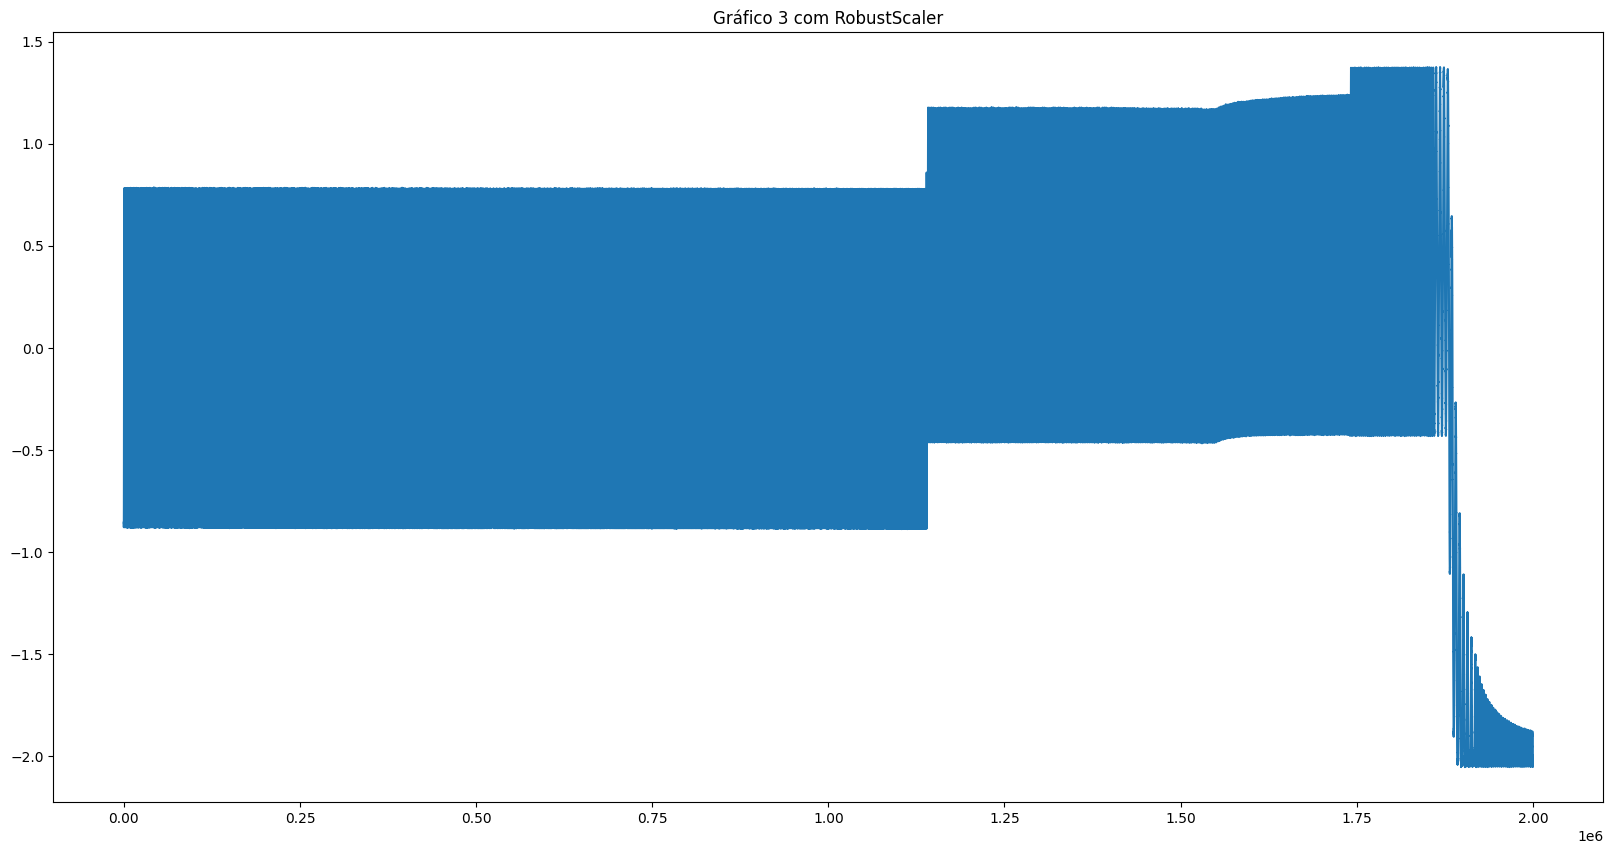

3


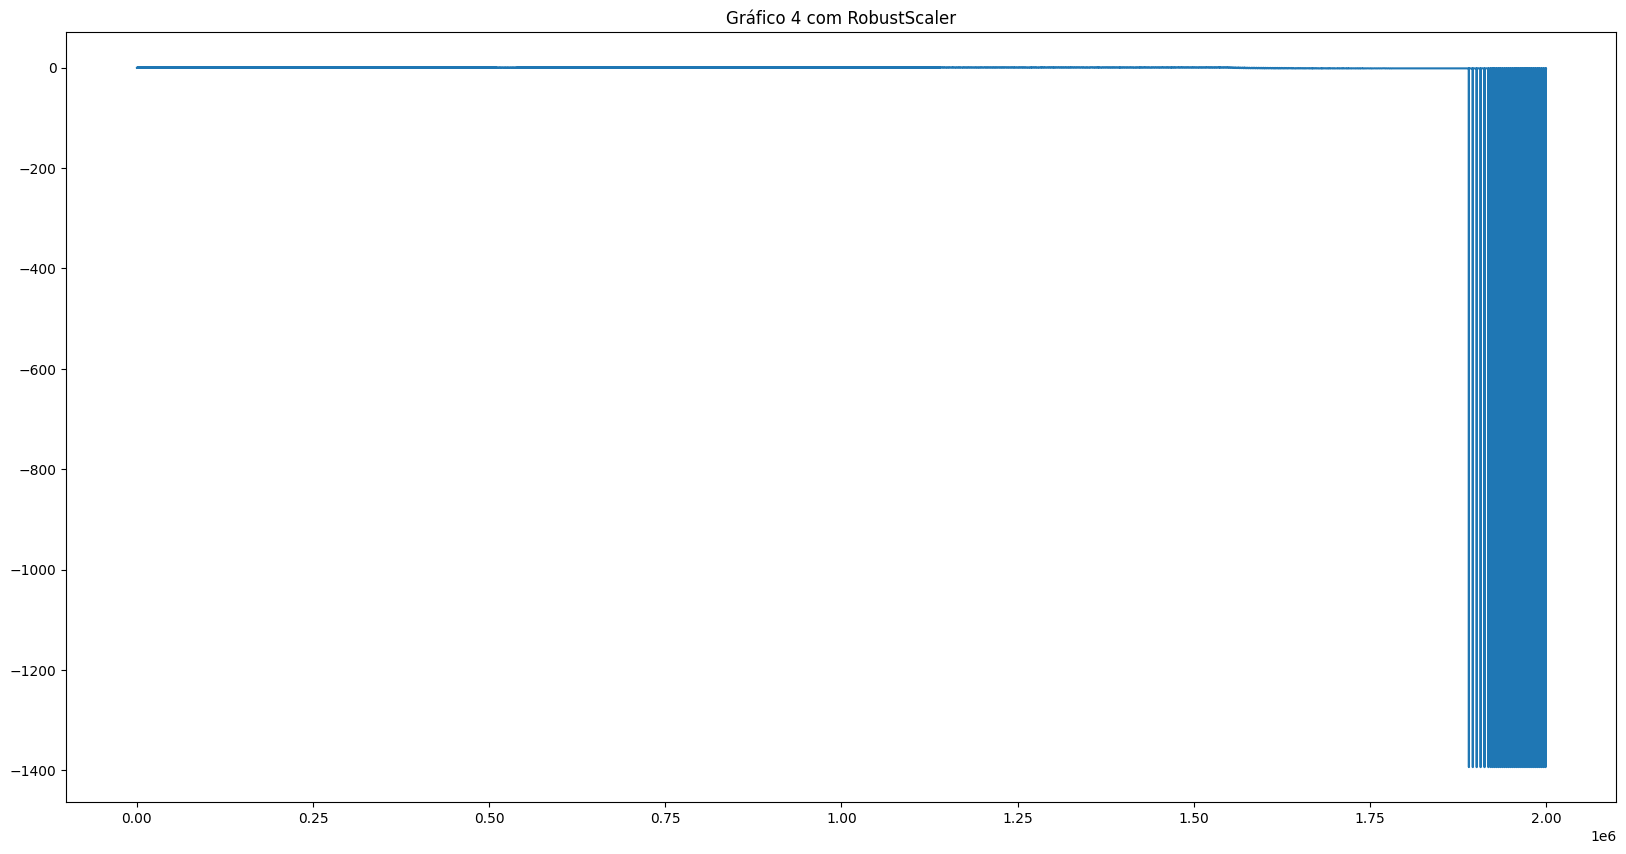

4


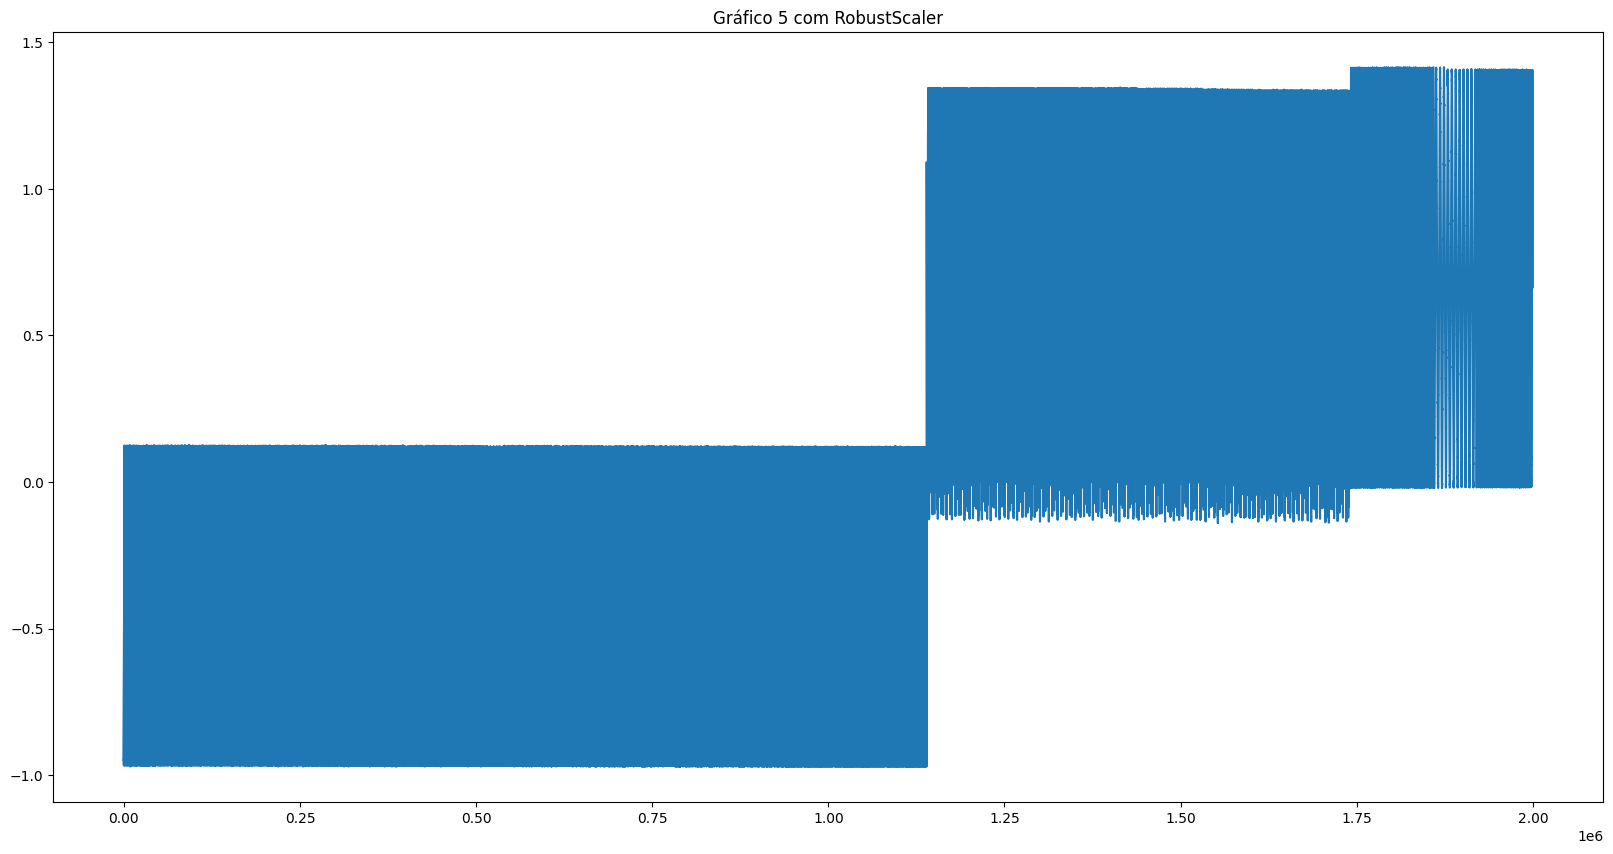

5


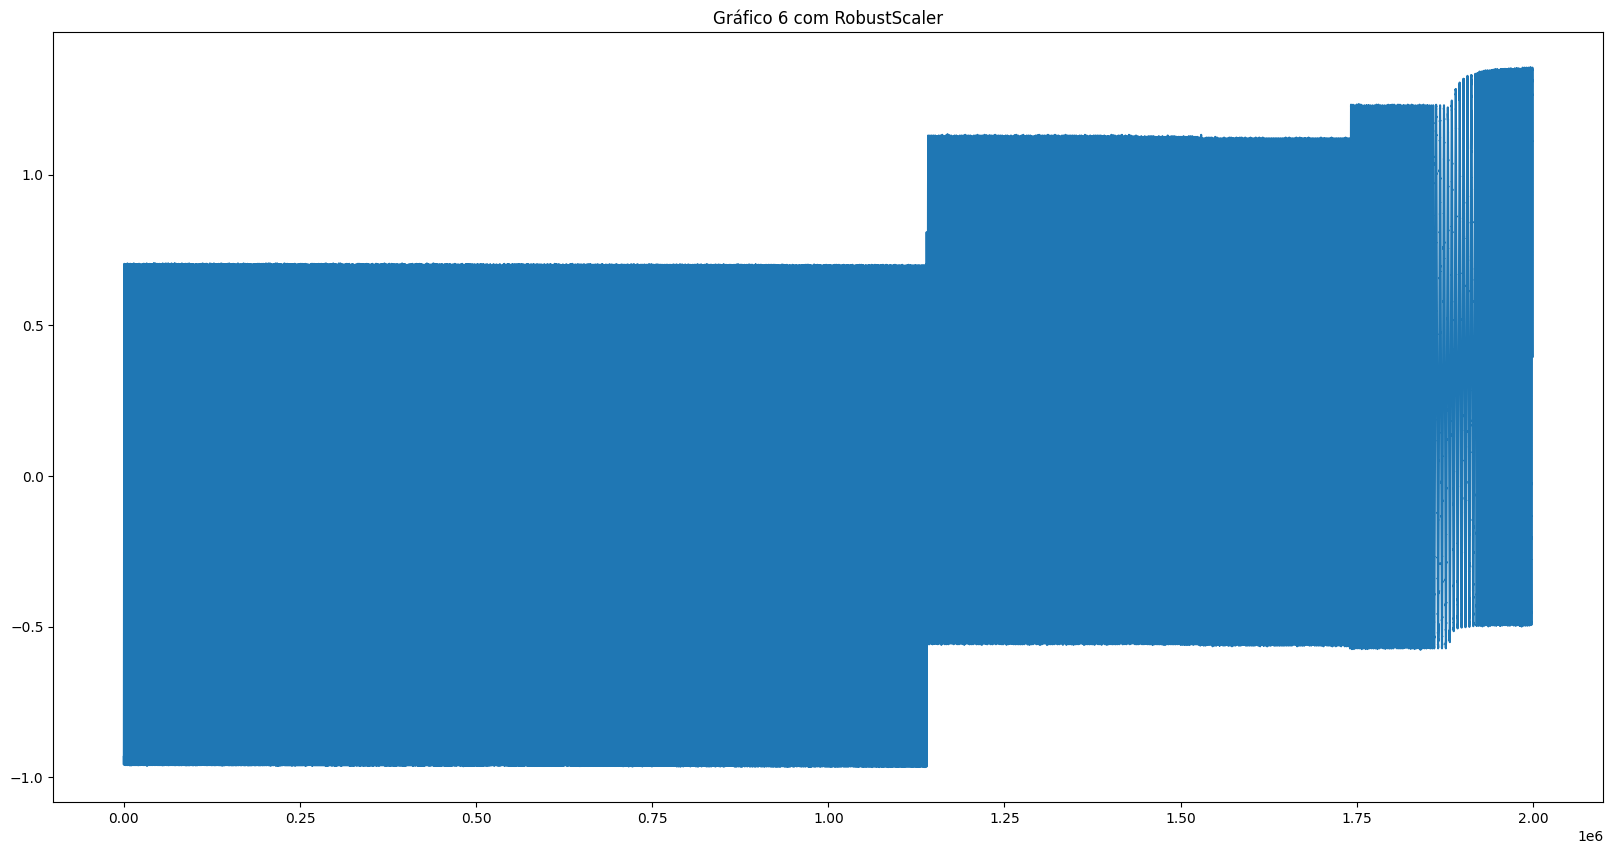

6


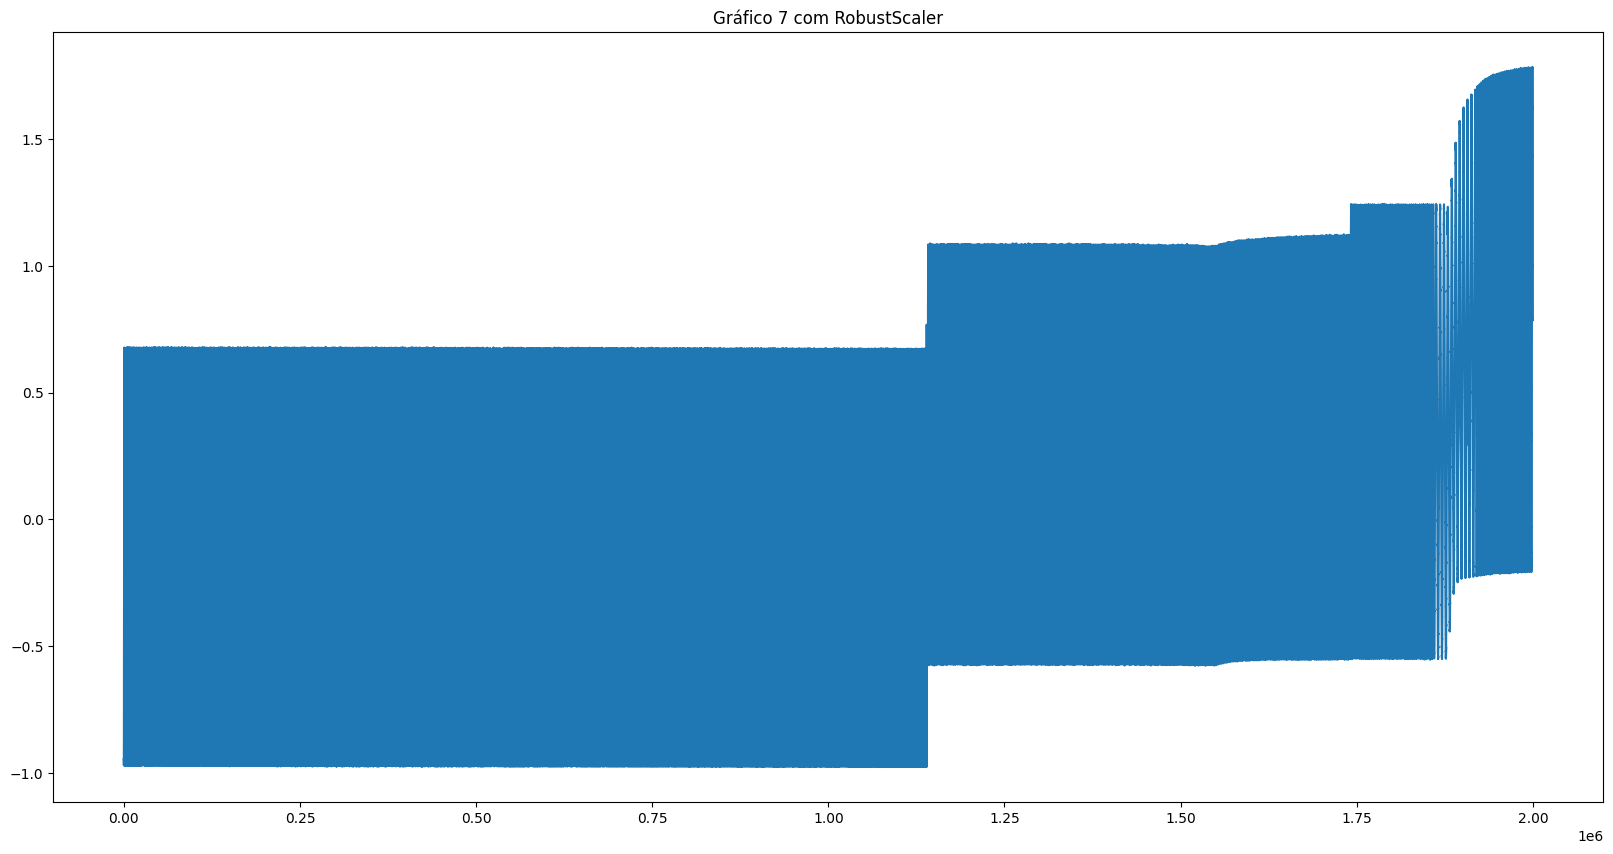

7


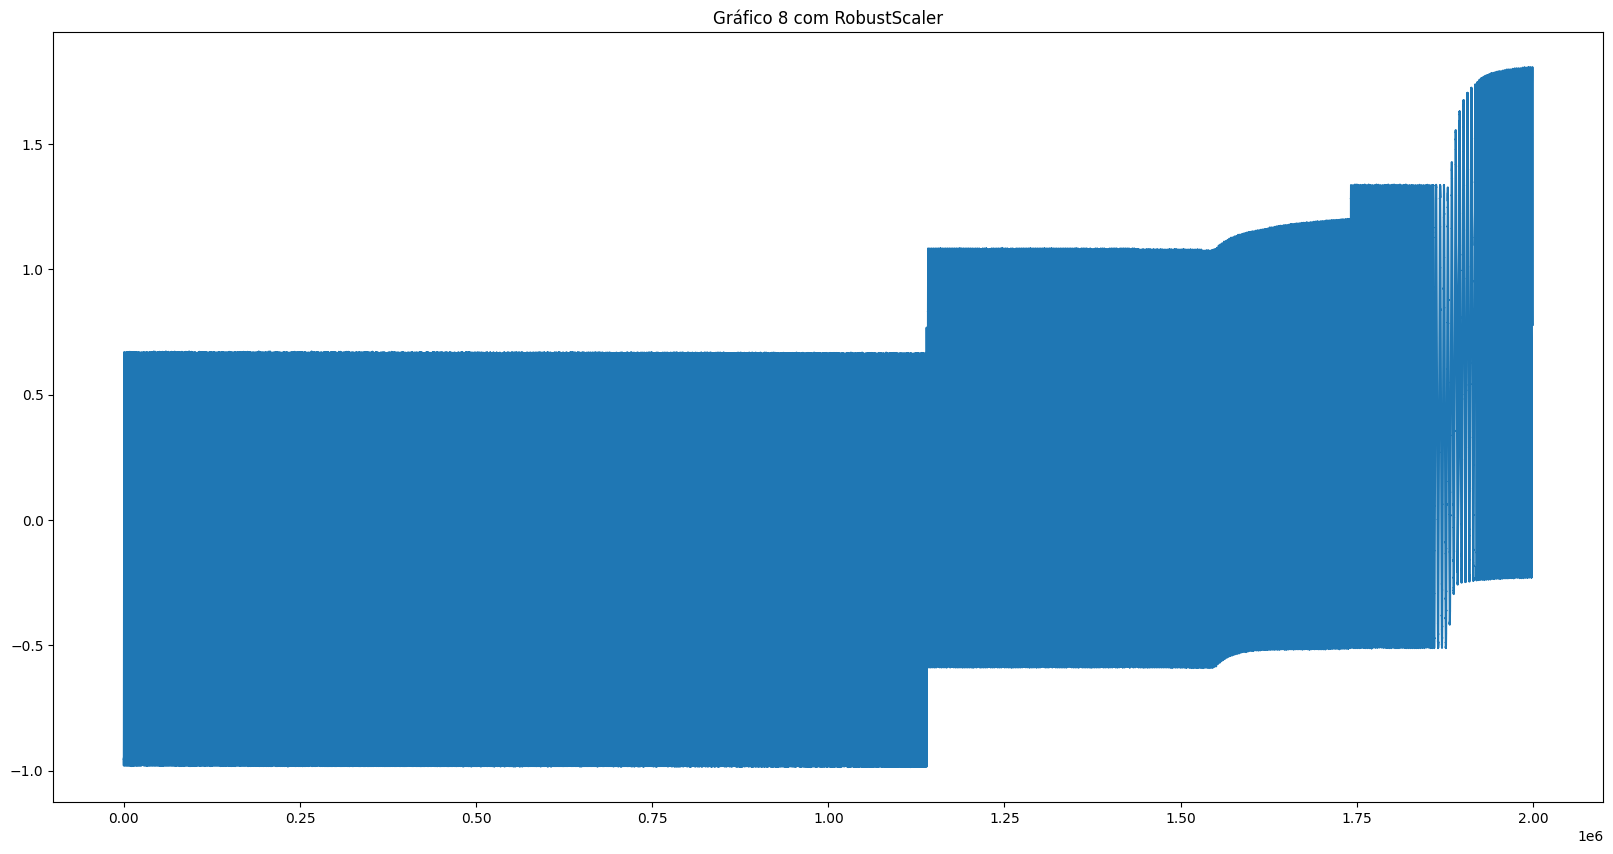

8


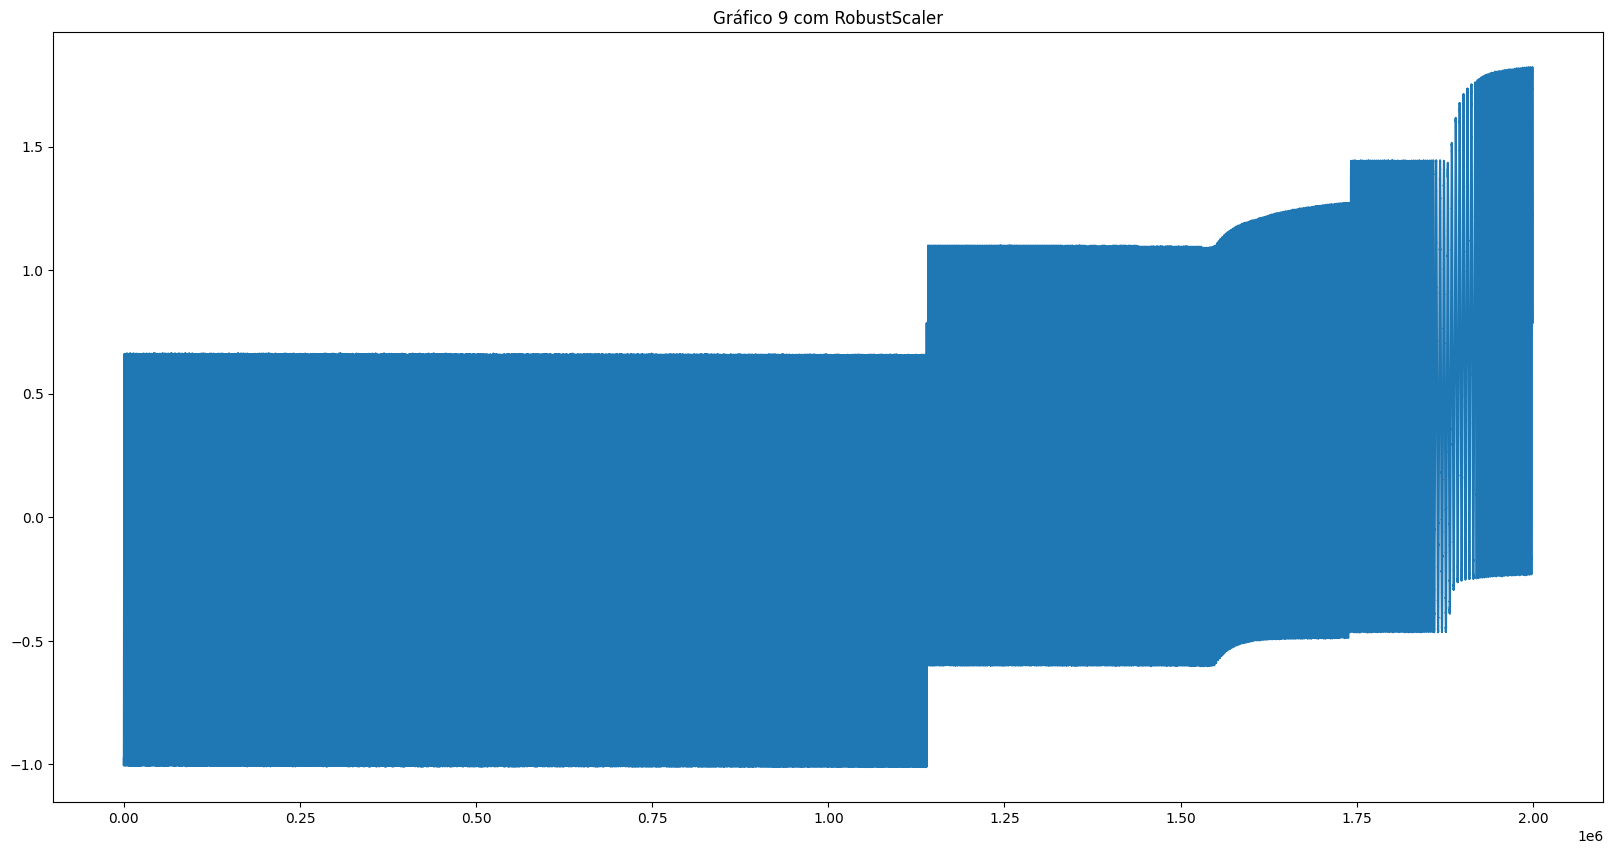

9


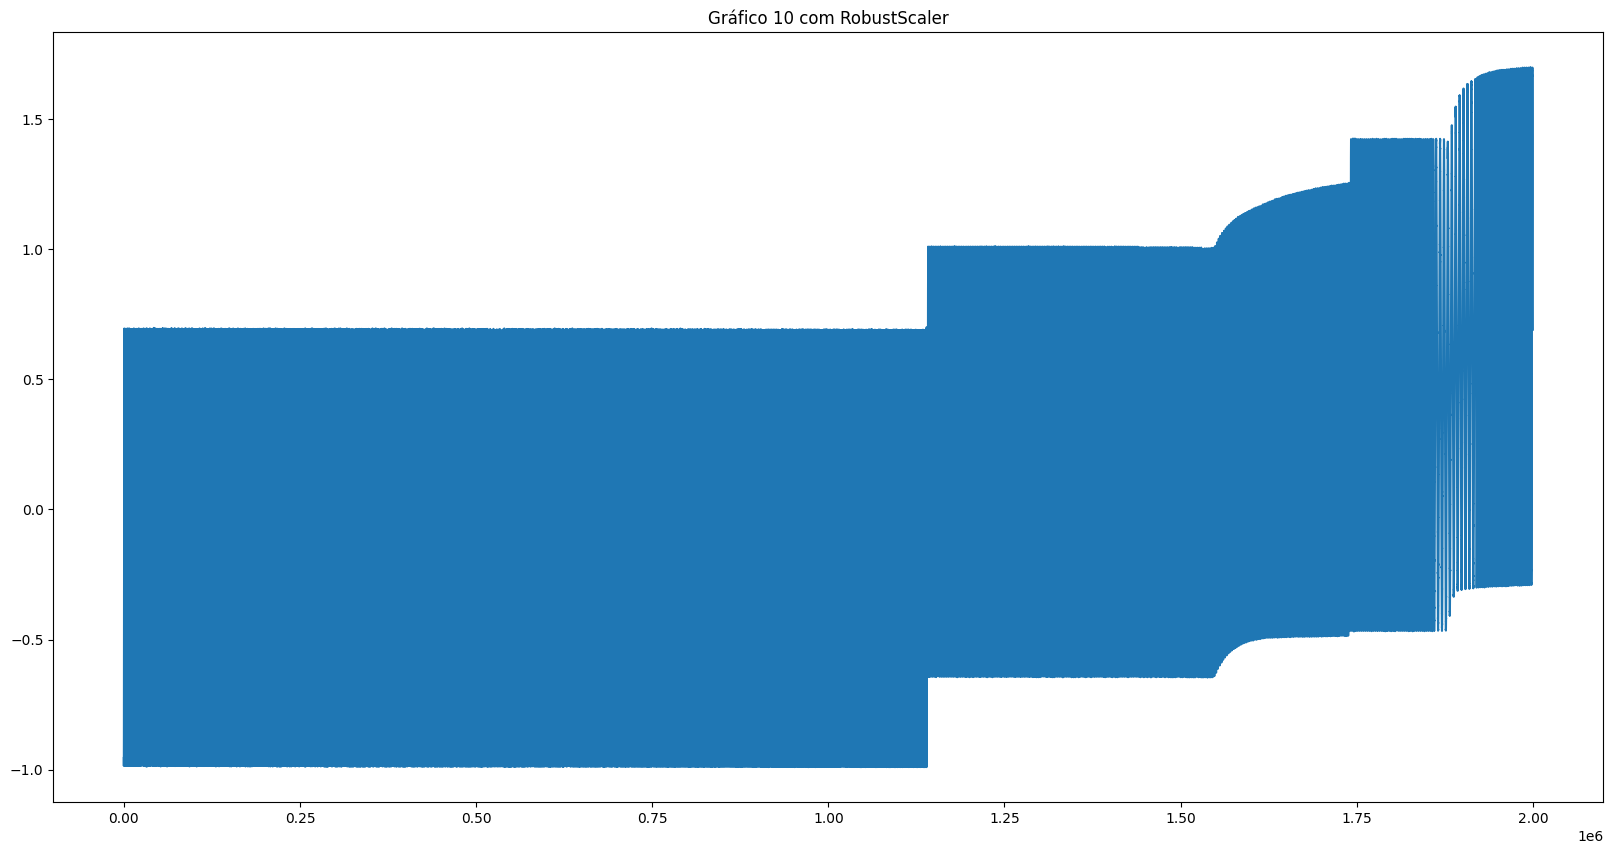

In [4]:
scaler = RobustScaler()
model = scaler.fit(dados)
dados_normalizados = model.transform(dados)
for i in range(0, 10):
    print(i)
    plt.figure(figsize=(20,10))
    plt.plot(dados_normalizados[:, i])
    plt.title(f'Gráfico {i+1} com RobustScaler')
    plt.show()

Novamente obtemos um gráfico visualmente similar, mas com uma escala de valores que varia de -1 a aproximadamente 1.5. Note que no gráfico 4 e 1 os outliers permanecem com valores muito distantes da média. Enquanto nos gráficos 2, 3 e 5 estão com valores próximos e dificultam a detecção das anomalias.

#### Interpretação da Visualização dos Dados

Os outliers são identificáveis a olho facilmente, mas a máquina precisa aprender a identificar eles, o que a normalização deve ajudar, embora em algumas opções não tenha sido ideal e distorceram os outliers ou as demais medidas perderam informação.

O `MinMaxScaler` foi o mais impactante nesse sentido, pois, houveram casos em que o outlier estava em zero e todas as demais amostras em 1, causando uma perda de informação muito grande.

O `StandardScaler` teve perda de informação significativa em alguns casos, como nos gráficos 4 e 1.

O `RobustScaler` foi o que teve o melhor resultado, pois, manteve os outliers com valores muito distantes da média, mas também não distorceu as demais amostras.

## 3. Deteccção de Anomalias

Para os dados do sensor 3, é possível detectar as anomalias a partir da observação dos dados anteriormente, e então decidir usar como *threshold* o valor 2, pois, é o valor que mais se aproxima dos outliers.

Entretantom, essa abordagem deve ser feita individualmente para cada conjunto de dados, pois, é usada a partir da análise visual dos dados.

32975


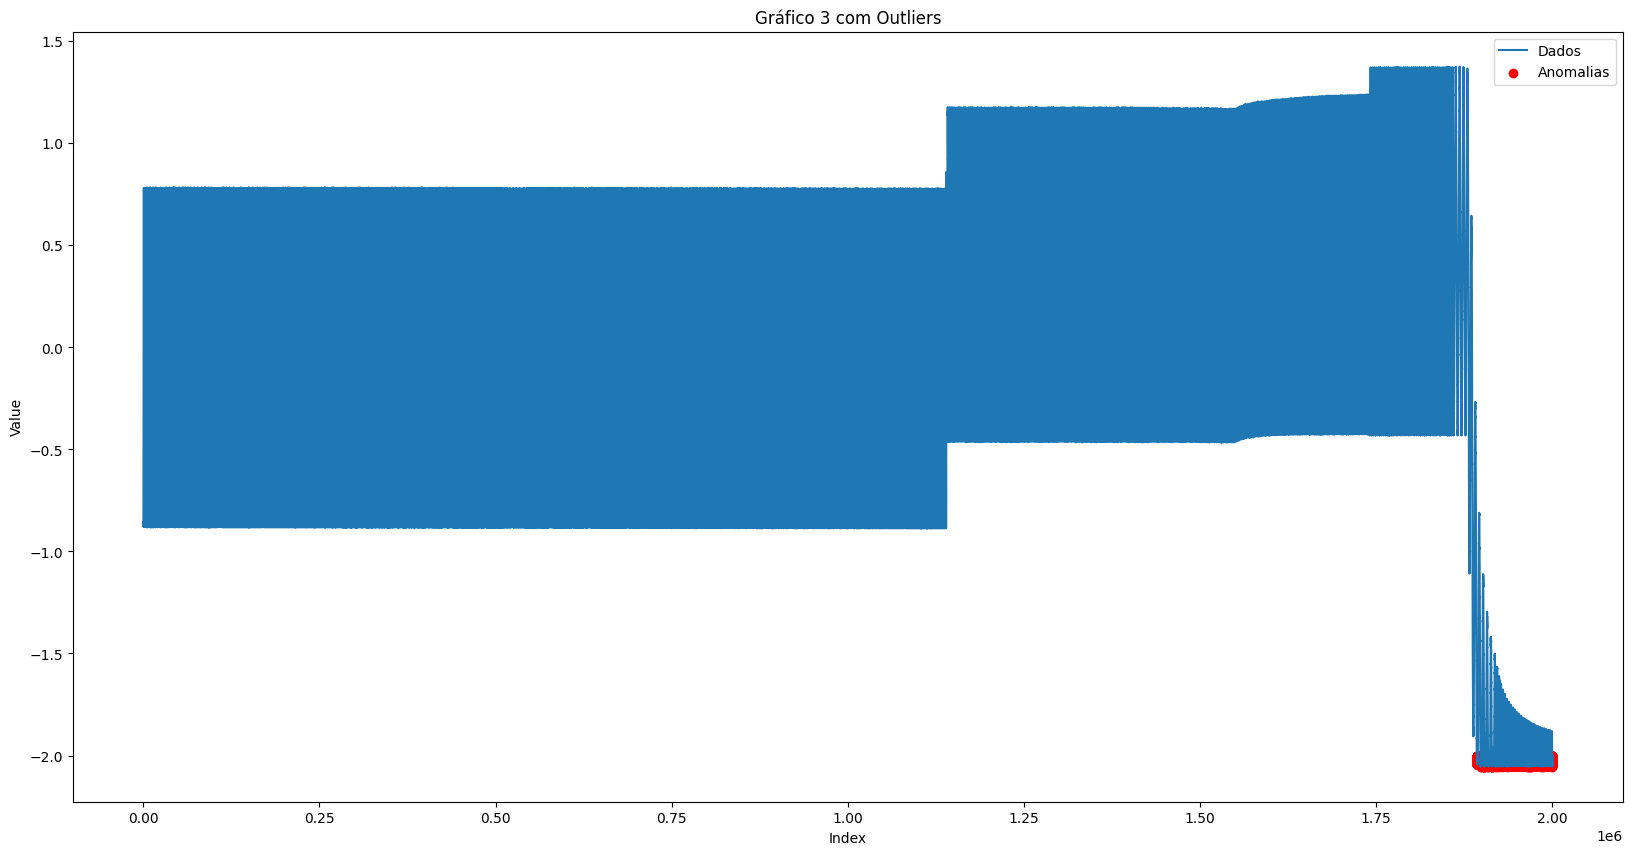

In [24]:
threshold = 2
sensor_escolhido = dados_normalizados[:, 2]
anomalies = sensor_escolhido[np.abs(sensor_escolhido) > threshold]
print(len(anomalies))
indices = np.where(np.abs(sensor_escolhido) > threshold)[0]


plt.figure(figsize=(20,10))
plt.plot(sensor_escolhido, label='Dados')
plt.scatter(indices, sensor_escolhido[indices], c='r', label='Anomalias')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title(f'Gráfico 2 com Outliers')
plt.show()


#### Agora, vamos detectar as anomalias nos demais dataframes

Conjunto de amostras do sensor 1:

Reduzimos os dados através da separação em blocos de 200 amostras e calculamos a média de cada um desses blocos. Em seguida calculamos o Z-Score e plotamos os dados com os outliers marcados.

Para este caso, o uso de Z-Score para detecção funcionou muito bem, conforme o gráfico abaixo.

(2000000,)
0.027999371
0.5958273


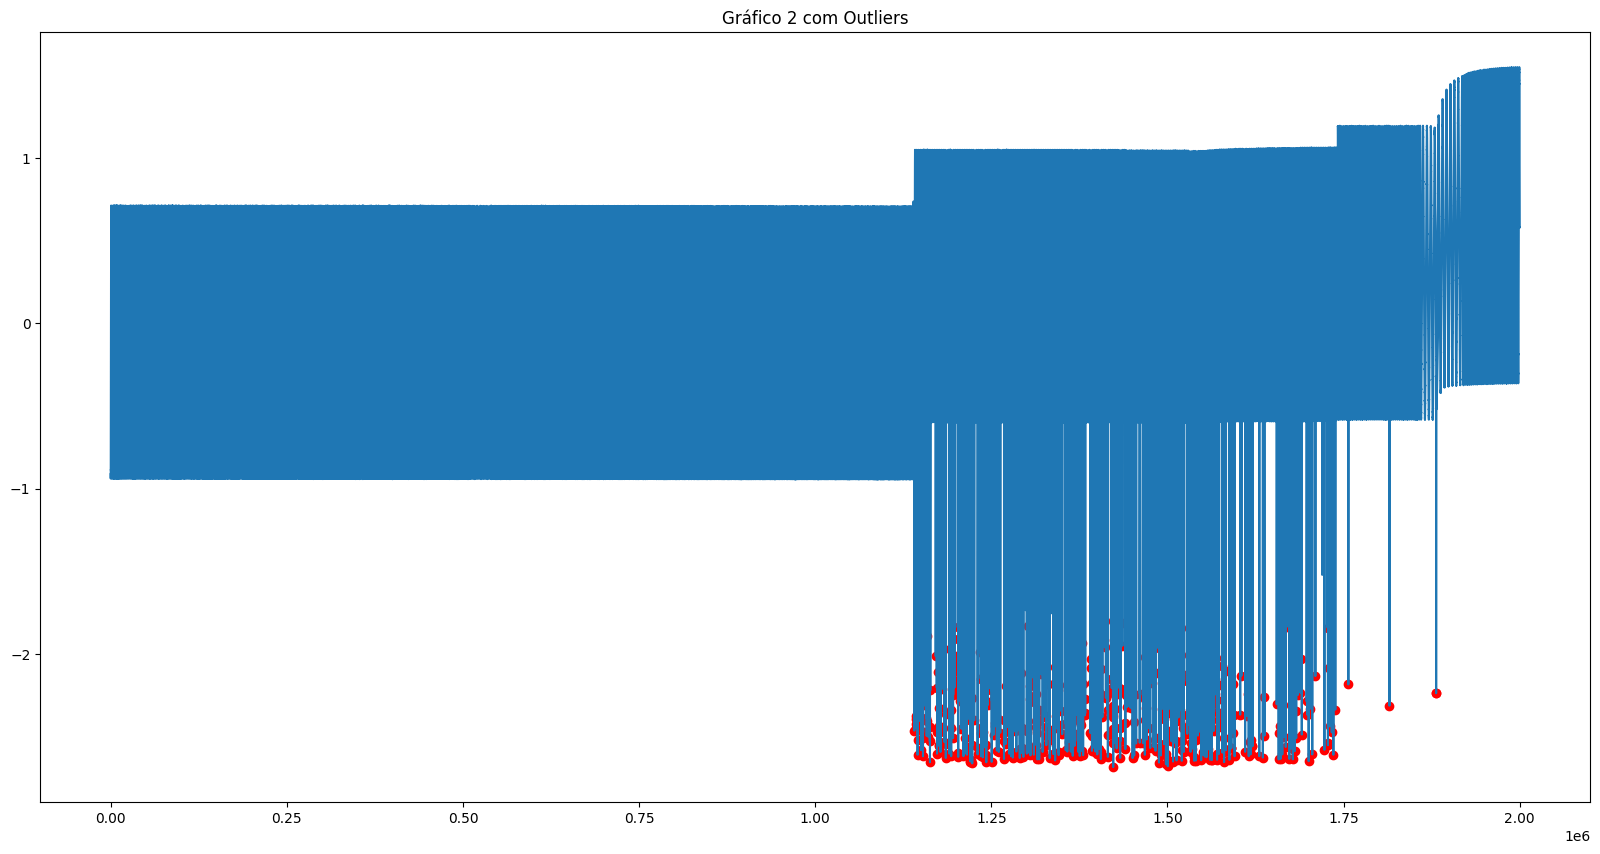

In [26]:
dados_df1 = dados_normalizados[:, 1]
dados_reduzidos = np.mean(dados_df1.reshape(-1, 200), axis=1)
len(dados_reduzidos)

column = dados_df1
print(column.shape)
mean = np.mean(column)
print(mean)
std = np.std(column)
print(std)
z_scores = (column - mean) / std

indices = np.where(np.abs(z_scores) > 3)

plt.figure(figsize=(20,10))
plt.plot(dados_df1)
plt.scatter(indices, dados_df1[indices], c='r', label='Anomalias')
plt.title(f'Gráfico 2 com Outliers')
plt.show()

Os outliers foram detectados com sucesso nas amostras do sensor 2.

(2000000,)
-0.14668669
17.695421


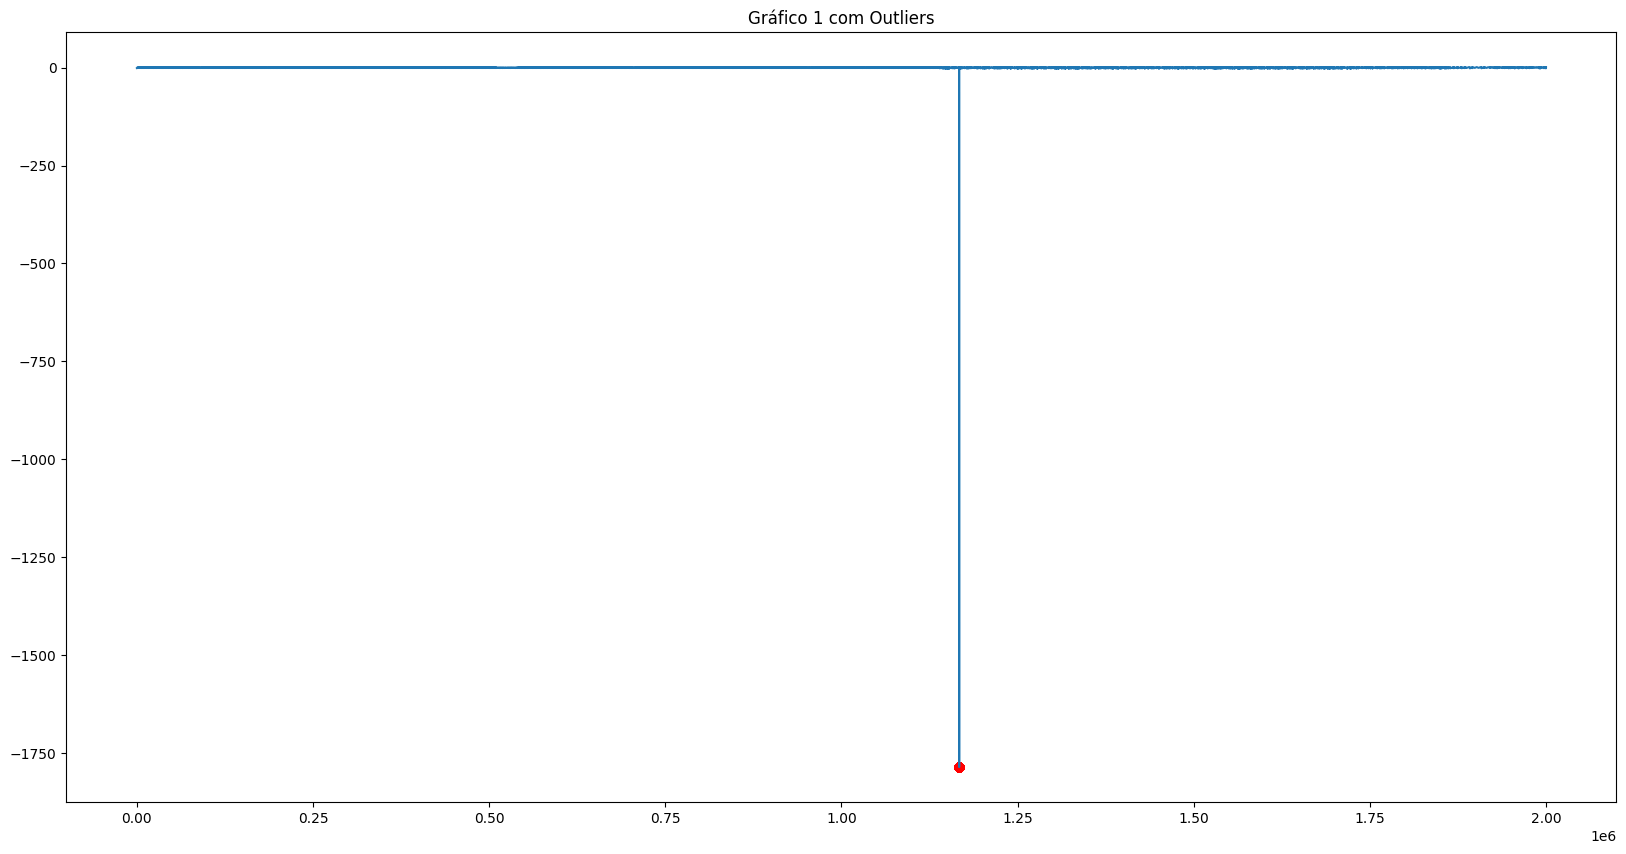

In [25]:
dados_df0 = dados_normalizados[:, 0]
dados_reduzidos = np.mean(dados_df1.reshape(-1, 200), axis=1)
len(dados_reduzidos)

column = dados_df0
print(column.shape)
mean = np.mean(column)
print(mean)
std = np.std(column)
print(std)
z_scores = (column - mean) / std

indices = np.where(np.abs(z_scores) > 3)

plt.figure(figsize=(20,10))
plt.plot(dados_df0)
plt.scatter(indices, dados_df0[indices], c='r', label='Anomalias')
plt.title(f'Gráfico 1 com Outliers')
plt.show()

Os outliers foram detectados com sucesso nas amostras do sensor 1.

Para o caso do terceiro dataframe, foi necessário ajustar a condição de outlier para Z-Scores maiores que 2.5, pois, para valores maiores que 3 não foi possível detectar os outliers.

(2000000,)
-0.023333758
0.73695195


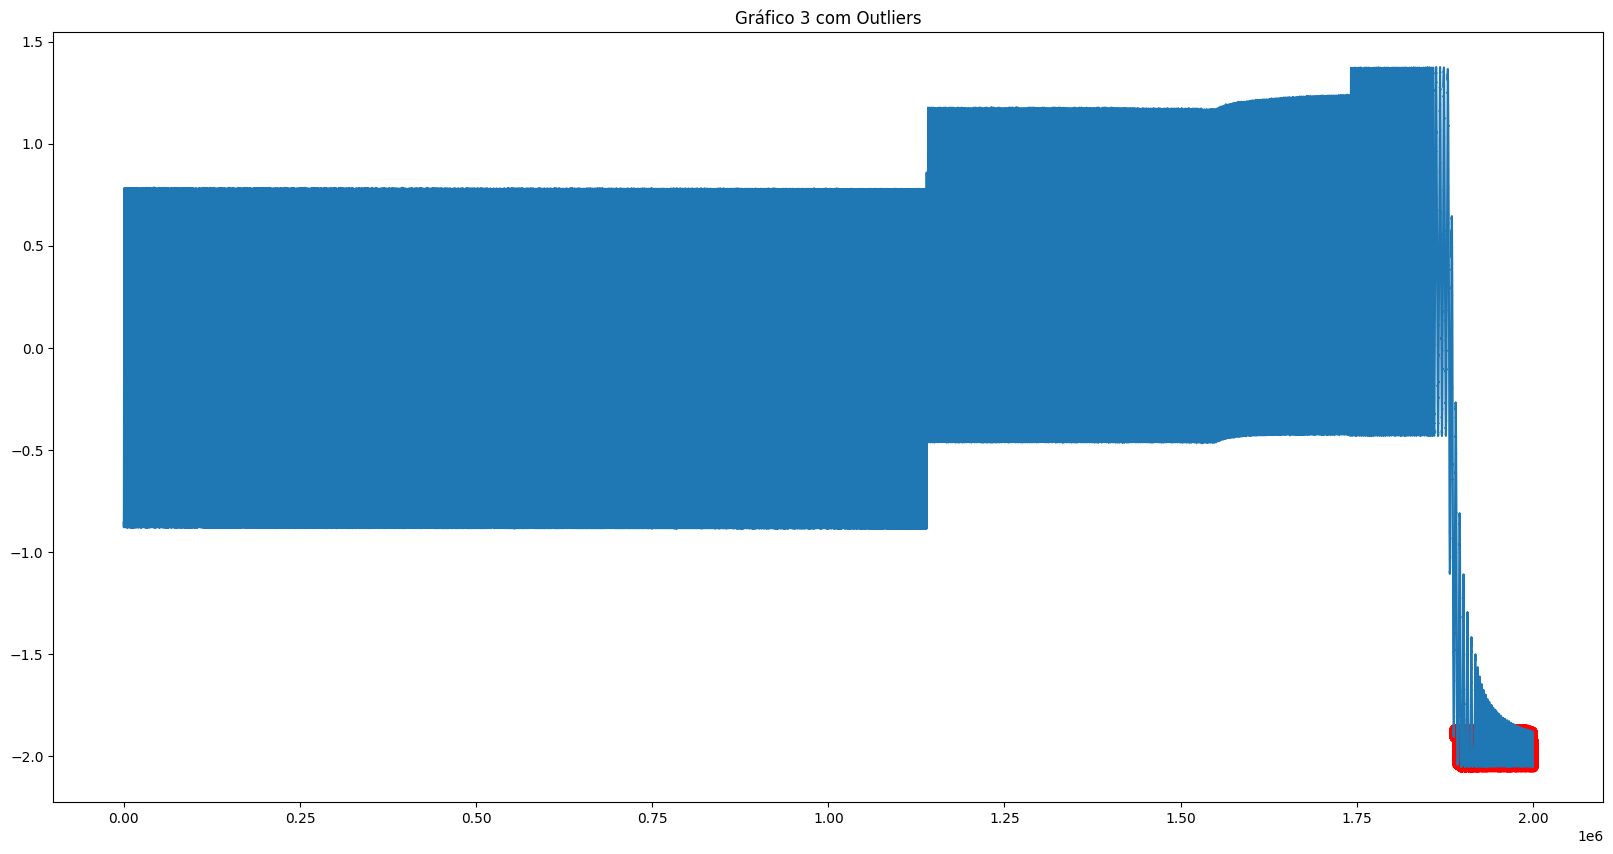

In [30]:
dados_df2 = dados_normalizados[:, 2]
len(dados_reduzidos)

column = dados_df2
print(column.shape)
mean = np.mean(column)
print(mean)
std = np.std(column)
print(std)
z_scores = (column - mean) / std

indices = np.where(np.abs(z_scores) > 2.5) # era 3

plt.figure(figsize=(20,10))
plt.plot(dados_df2)
plt.scatter(indices, dados_df2[indices], c='r', label='Anomalias')
plt.title(f'Gráfico 3 com Outliers')
plt.show()

Os outliers foram detectados com sucesso nas amostras do sensor 3.

(2000000,)
-9.598094
114.79587


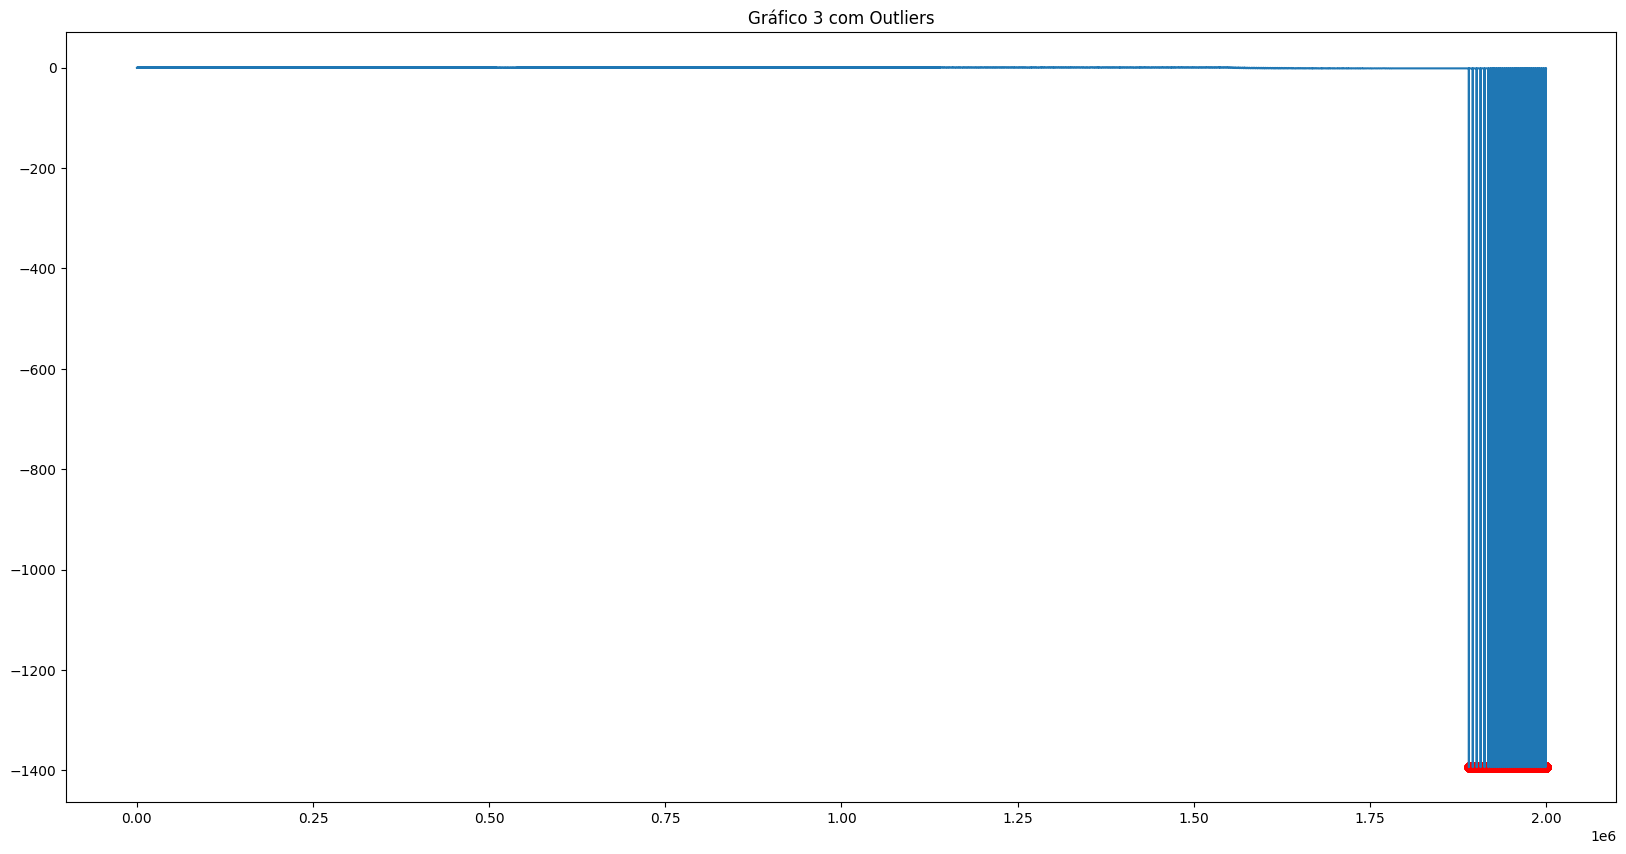

In [8]:
dados_df3 = dados_normalizados[:, 3]
len(dados_reduzidos)

column = dados_df3
print(column.shape)
mean = np.mean(column)
print(mean)
std = np.std(column)
print(std)
z_scores = (column - mean) / std

indices = np.where(np.abs(z_scores) > 3)

plt.figure(figsize=(20,10))
plt.plot(dados_df3)
plt.scatter(indices, dados_df3[indices], c='r', label='Anomalias')
plt.title(f'Gráfico 4 com Outliers')
plt.show()

Os outliers foram detectados com sucesso no conjunto de dados 3.

Para o quinto conjunto de dados não obtive sucesso com Z-Scores, por ter classificado amostras normais como outliers. 

O Isolation Forest também não teve sucesso, classificando amostras normais como outliers.

Foi tentado também o `OneClassSVM` mas o tempo de execução ultrapassou 10 minutos e não foi possível obter o resultado.

Foi tentado também o `LocalOutlierFactor` mas eel classificou quase todas as amostras como outliers.

[[-0.9499885 ]
 [-0.9499885 ]
 [-0.9481533 ]
 ...
 [ 0.6701079 ]
 [ 0.66620785]
 [ 0.66437256]]


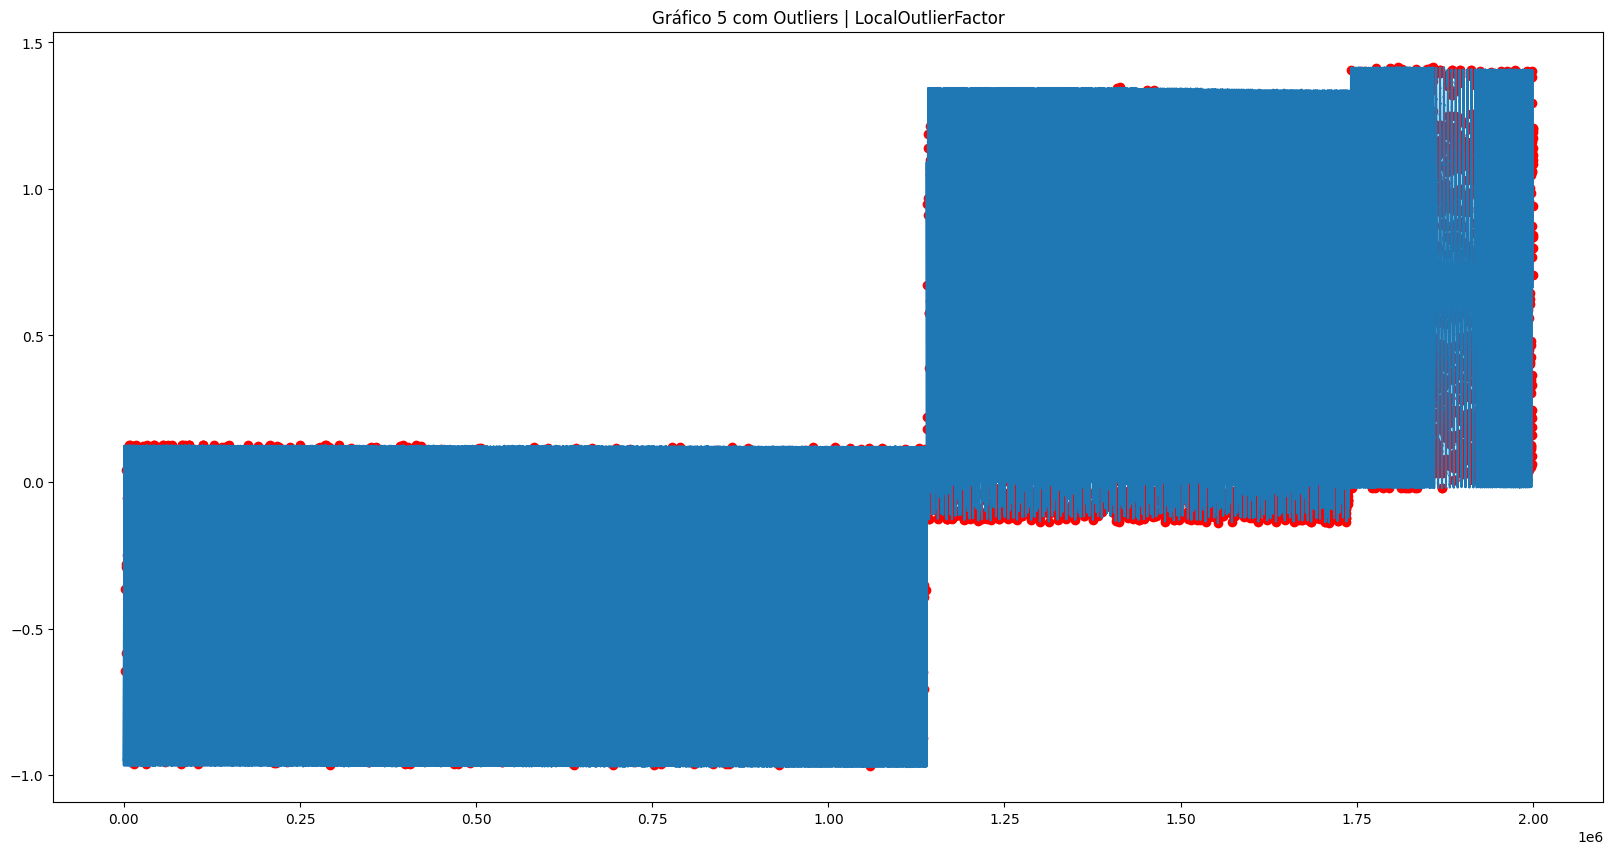

In [29]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

model = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

dados_df4 = dados_normalizados[:, 4].reshape(-1, 1)

len(dados_df4)
print(dados_df4)

model.fit(dados_df4) 
predictions = model.fit_predict(dados_df4)

indices = np.where(predictions == -1)

plt.figure(figsize=(20,10))
plt.plot(dados_df4)
plt.scatter(indices, dados_df4[indices], c='r', label='Anomalias')
plt.title(f'Gráfico 5 com Outliers | LocalOutlierFactor')
plt.show()

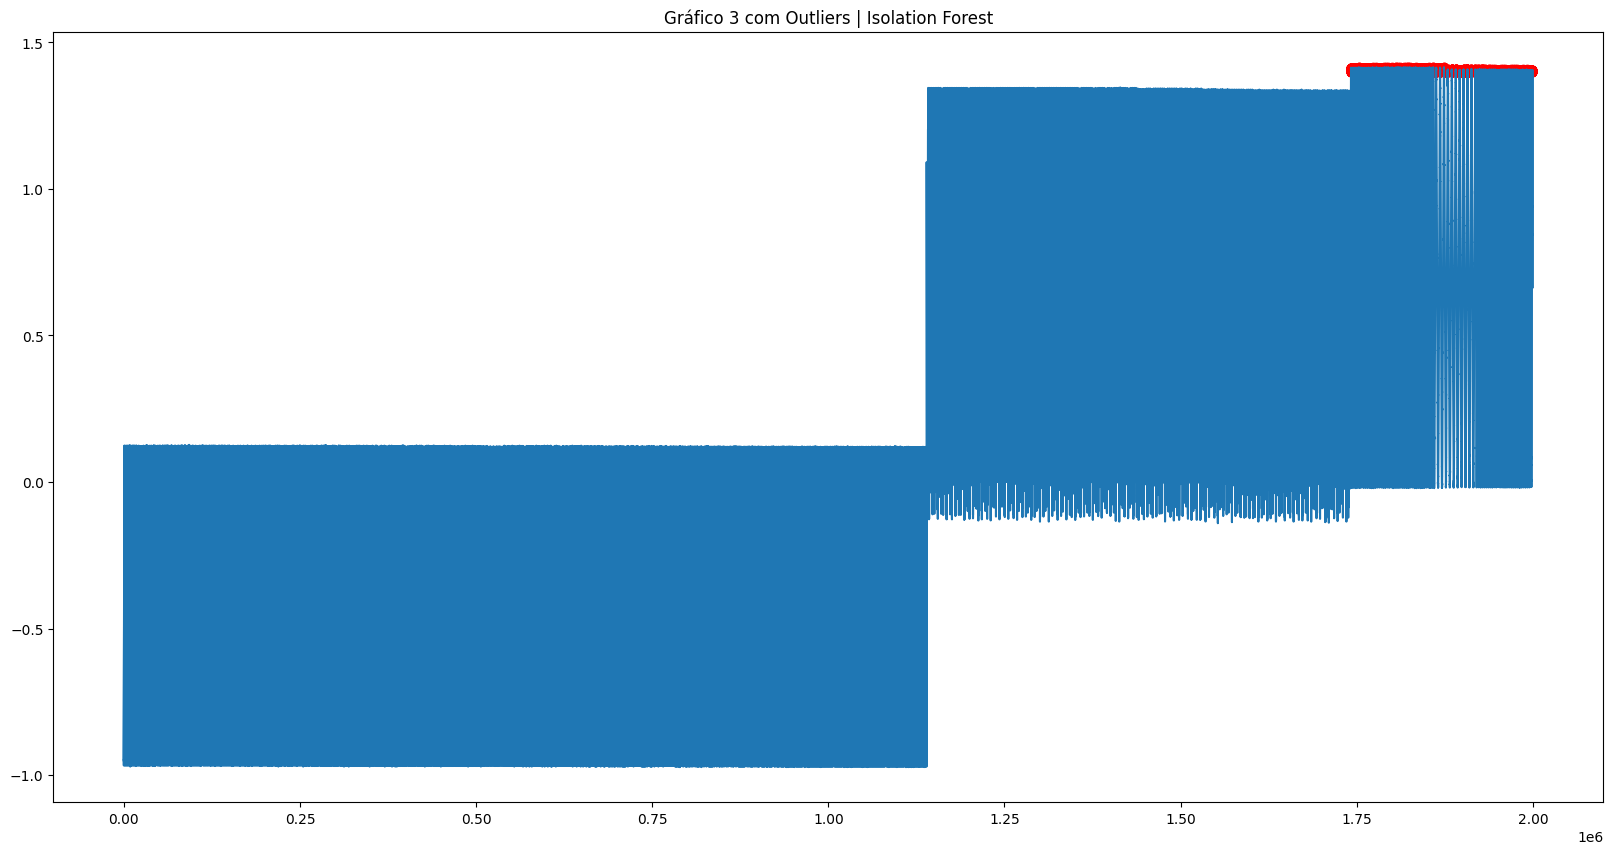

In [28]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.004)

model.fit(dados_df4) 
predictions = model.fit_predict(dados_df4)

indices = np.where(predictions == -1)

plt.figure(figsize=(20,10))
plt.plot(dados_df4)
plt.scatter(indices, dados_df4[indices], c='r', label='Anomalias')
plt.title(f'Gráfico 3 com Outliers | Isolation Forest')
plt.show()

(2000000,)
0.028802555
0.671081


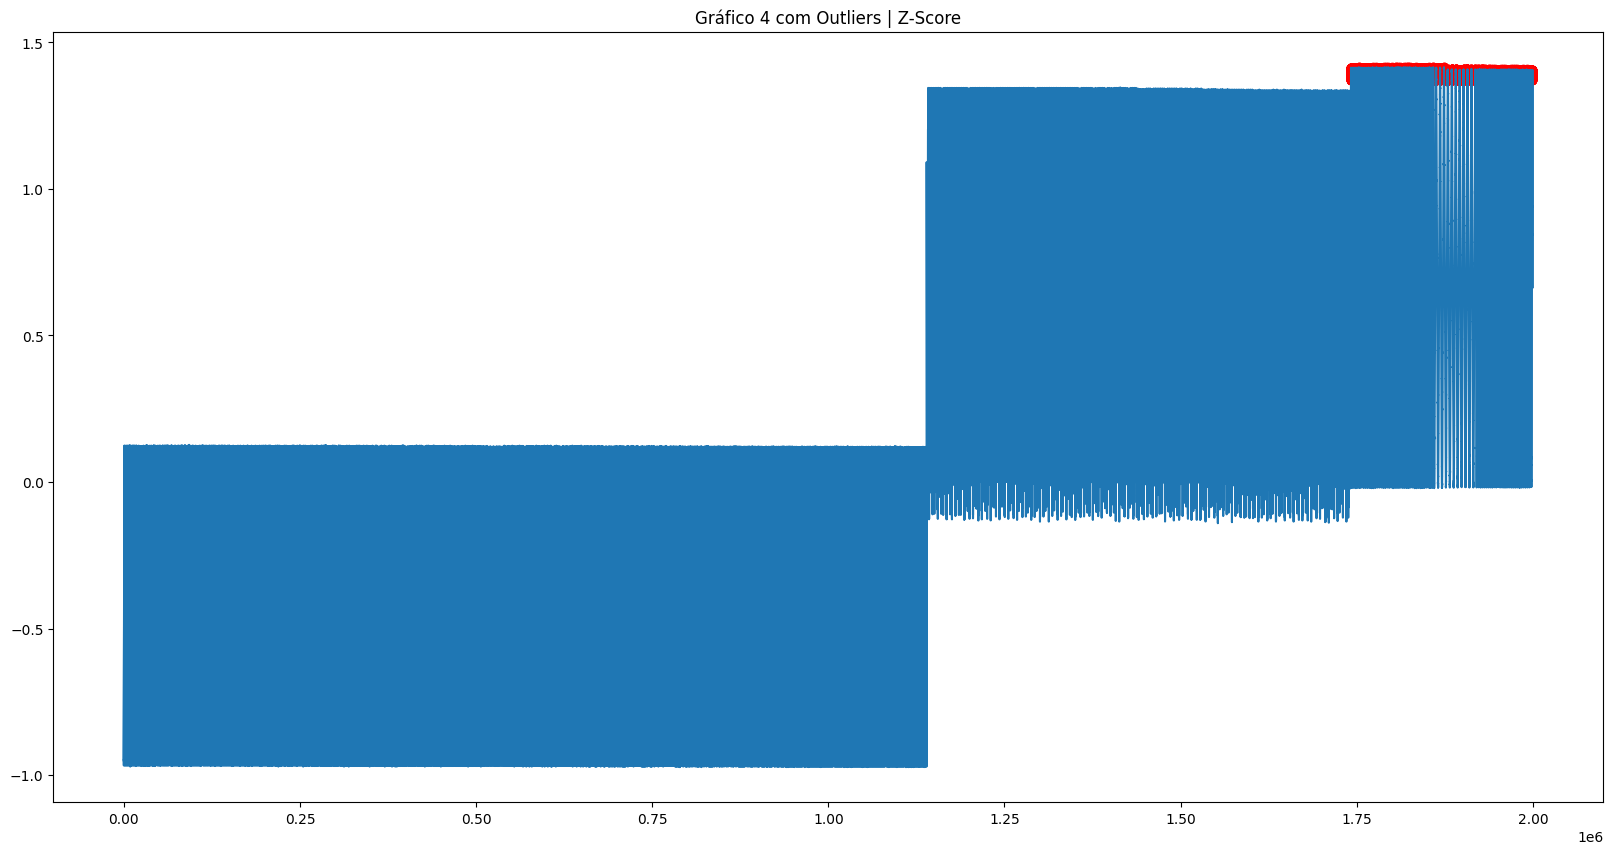

In [16]:
column = dados_normalizados[:, 4]
print(column.shape)
mean = np.mean(column)
print(mean)
std = np.std(column)
print(std)
z_scores = (column - mean) / std

indices = np.where(np.abs(z_scores) > 2)
plt.figure(figsize=(20,10))
plt.plot(dados_df4)
plt.scatter(indices, dados_df4[indices], c='r', label='Anomalias')
plt.title(f'Gráfico 3 com Outliers | Z-Score')
plt.show()

Neste caso não foi possível detectar os outliers.

(2000000,)
0.029526643
0.60172373


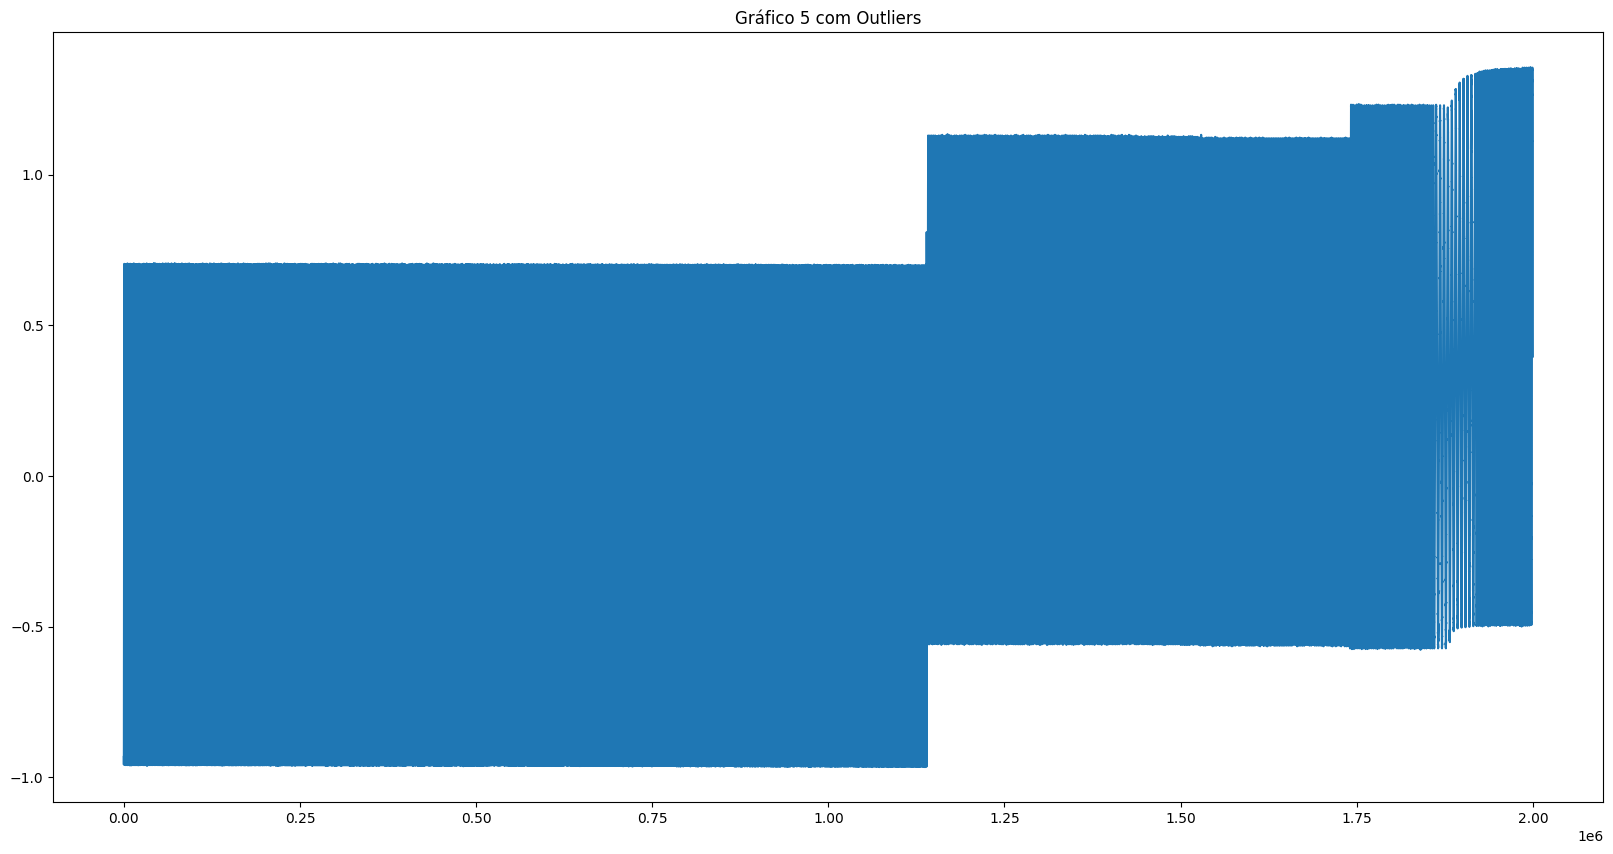

In [18]:
dados_df5 = dados_normalizados[:, 5]
len(dados_reduzidos)

column = dados_df5
print(column.shape)
mean = np.mean(column)
print(mean)
std = np.std(column)
print(std)
z_scores = (column - mean) / std

indices = np.where(np.abs(z_scores) > 3)

plt.figure(figsize=(20,10))
plt.plot(dados_df5)
plt.scatter(indices, dados_df5[indices], c='r', label='Anomalias')
plt.title(f'Gráfico 6 com Outliers')
plt.show()

Neste caso não houveram outliers.

(2000000,)
0.0330629
0.61888874


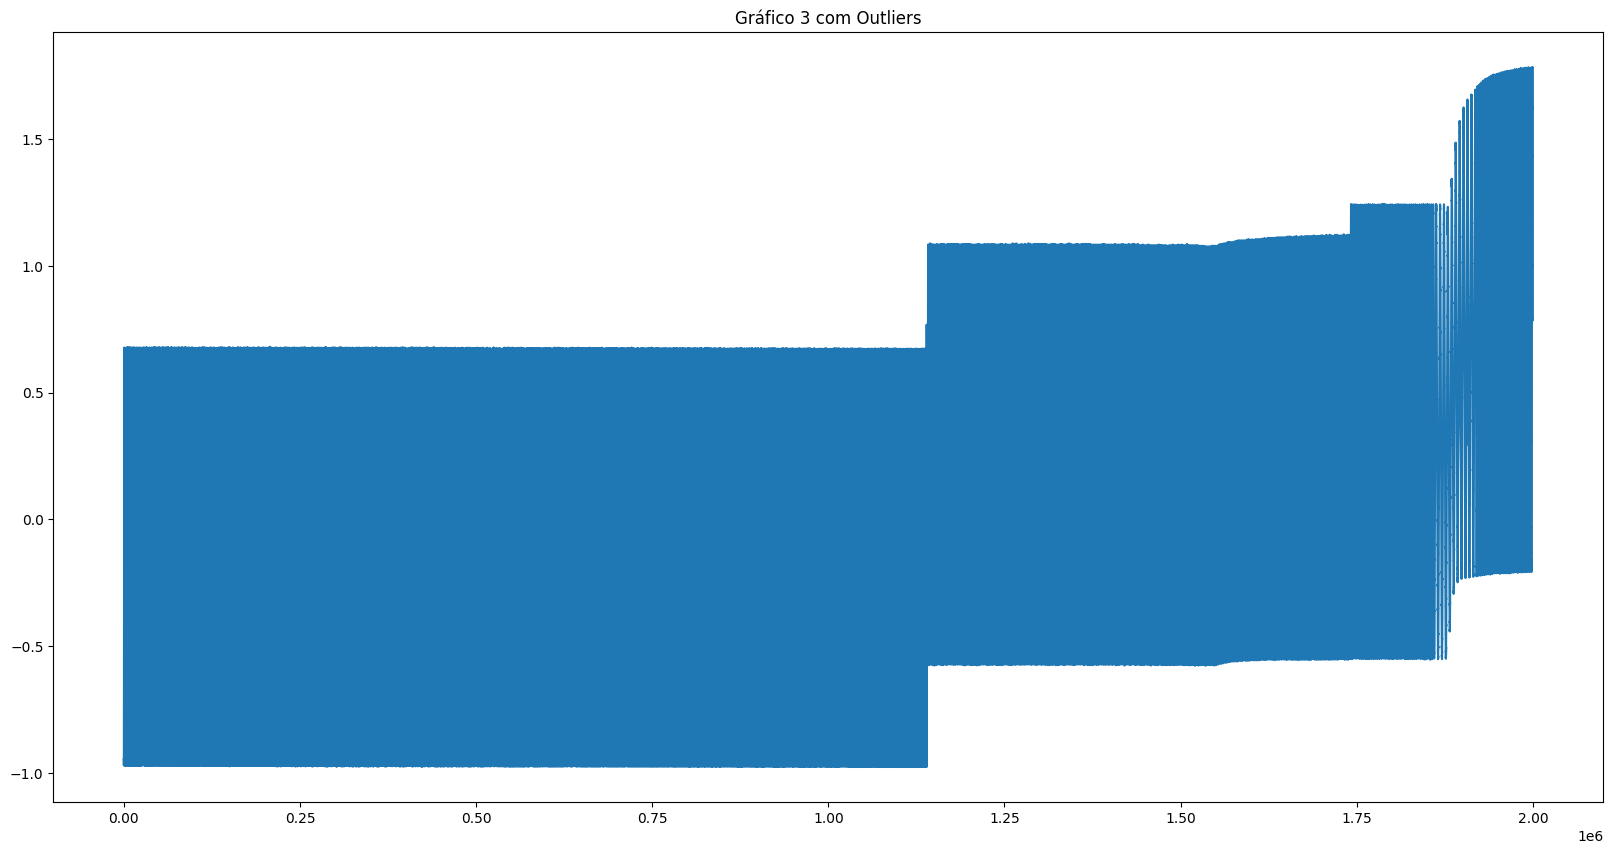

In [19]:
dados_df6 = dados_normalizados[:, 6]
len(dados_reduzidos)

column = dados_df6
print(column.shape)
mean = np.mean(column)
print(mean)
std = np.std(column)
print(std)
z_scores = (column - mean) / std

indices = np.where(np.abs(z_scores) > 3)

plt.figure(figsize=(20,10))
plt.plot(dados_df6)
plt.scatter(indices, dados_df6[indices], c='r', label='Anomalias')
plt.title(f'Gráfico 7 com Outliers')
plt.show()

Neste caso não houveram outliers.

(2000000,)
0.03703041
0.62958175


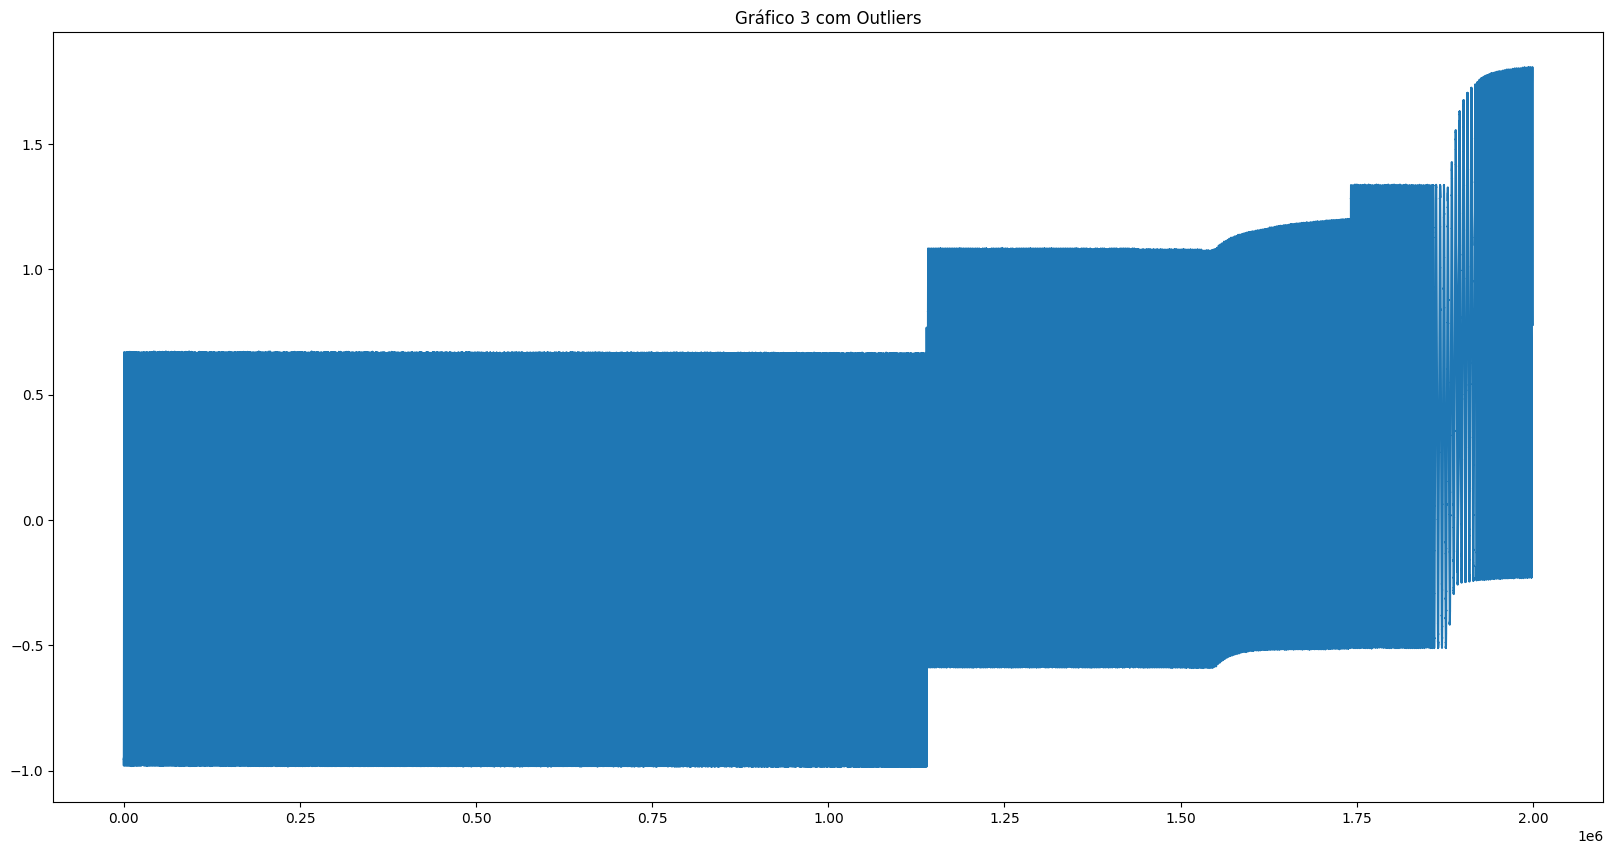

In [20]:
dados_df7 = dados_normalizados[:, 7]
len(dados_reduzidos)

column = dados_df7
print(column.shape)
mean = np.mean(column)
print(mean)
std = np.std(column)
print(std)
z_scores = (column - mean) / std

indices = np.where(np.abs(z_scores) > 3)

plt.figure(figsize=(20,10))
plt.plot(dados_df7)
plt.scatter(indices, dados_df7[indices], c='r', label='Anomalias')
plt.title(f'Gráfico 8 com Outliers')
plt.show()

Neste caso não houveram outliers.

(2000000,)
0.03879567
0.64609796


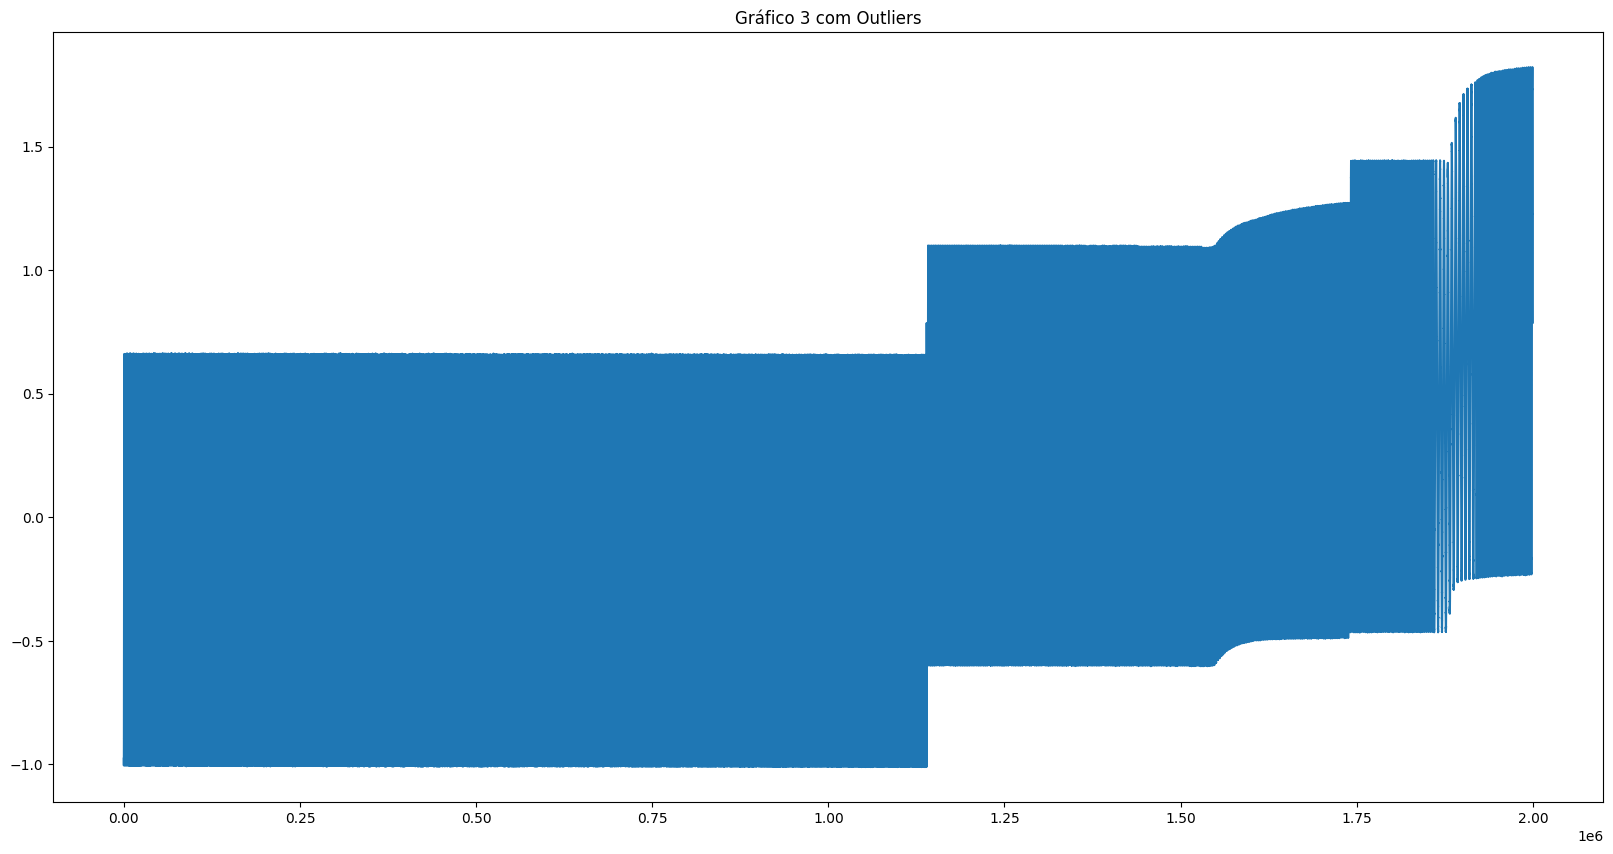

In [21]:
dados_df8 = dados_normalizados[:, 8]
len(dados_reduzidos)

column = dados_df8
print(column.shape)
mean = np.mean(column)
print(mean)
std = np.std(column)
print(std)
z_scores = (column - mean) / std

indices = np.where(np.abs(z_scores) > 3)

plt.figure(figsize=(20,10))
plt.plot(dados_df8)
plt.scatter(indices, dados_df8[indices], c='r', label='Anomalias')
plt.title(f'Gráfico 9 com Outliers')
plt.show()

Neste caso não houveram outliers.

(2000000,)
0.03216219
0.6274884


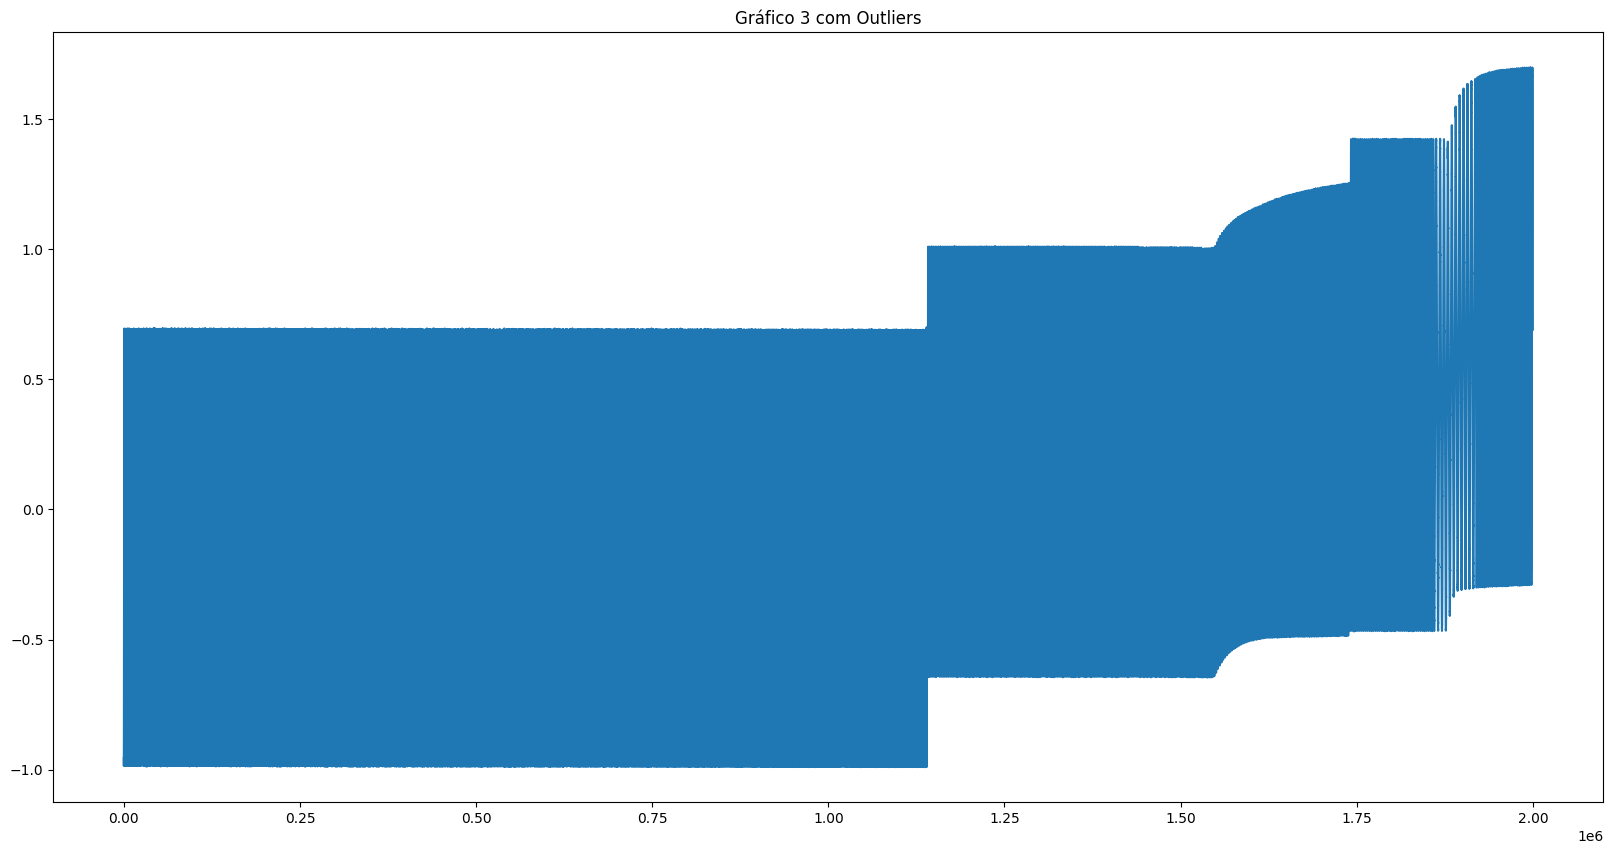

In [22]:
dados_df9 = dados_normalizados[:, 9]
len(dados_reduzidos)

column = dados_df9
print(column.shape)
mean = np.mean(column)
print(mean)
std = np.std(column)
print(std)
z_scores = (column - mean) / std

indices = np.where(np.abs(z_scores) > 3)

plt.figure(figsize=(20,10))
plt.plot(dados_df9)
plt.scatter(indices, dados_df9[indices], c='r', label='Anomalias')
plt.title(f'Gráfico 10 com Outliers')
plt.show()

Neste caso não houveram outliers.

### Resultados

Apenas o quinto conjunto de dados não foi possível detectar os outliers, apesar das 3 técnicas tentadas, os demais foram detectados com sucesso ou não possuem outliers.

Nos demais sensores não houveram outliers ou foram detectados com sucesso.

O uso do Z-Score é a abordagem mais simples e eficiente, para a maioria dos casos, então foi interessante tentar essa técnica primeiro antes de partir para outras abordagens.